# Methods for Data Science: Course Work 1

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Task 1:  Regression (50 marks)



First process the data. `x_train_airfoil_org` and `x_test_airfoil_org` are original data of predictors. 

In Lasso regression and Elastic nets regression, the magnitude of predictors will affect the magnitude of $\beta$, causing problems in regularsation. In KNN regression, the magnitude of predictors will affect the distance between $X$. So we need to standardise data of predictor variables. `x_train_airfoil` and `x_test_airfoil` are standardised data of predictors. 

Note that we do not need to standardise $y$ since $\beta_0$ is not included in regularsation and magnitude of $y$ has no effect on KNN regression.

In [4]:
# load data as pandas data frames
airfoil_train = pd.read_csv('airfoil_noise_samples.csv')
airfoil_test = pd.read_csv('airfoil_noise_test.csv')

In [3]:
# standardise function
def standardise(X):
    mu = np.mean(X, 0) # mean of data X
    sigma = np.std(X, 0) # standard deviation of data X
    X_std = (X - mu) / sigma # standardise data
    return X_std

In [4]:
# divide the data into predictors and observations
predictors_airfoil = ["Frequency","Angle","Displacement","Chord length","Velocity","Thickness"]

x_train_airfoil_org = airfoil_train[predictors_airfoil]
x_train_airfoil = standardise(x_train_airfoil_org)
y_train_airfoil = airfoil_train["Sound Pressure"]

x_test_airfoil_org = airfoil_test[predictors_airfoil]
x_test_airfoil = (x_test_airfoil_org - np.mean(x_train_airfoil_org, 0)) / np.std(x_train_airfoil_org, 0)
y_test_airfoil = airfoil_test["Sound Pressure"]

We add a column to $X$ on the left hand side in order to include $\beta_0$ in regression.

In [5]:
# add an N x 1 column to include beta_0
N_train_airfoil, D_train_airfoil = x_train_airfoil.shape
N_test_airfoil, D_test_airfoil = x_test_airfoil.shape

x_train_airfoil_aug = np.hstack([np.ones((N_train_airfoil,1)), x_train_airfoil])
x_test_airfoil_aug = np.hstack([np.ones((N_test_airfoil,1)), x_test_airfoil])
x_train_airfoil_org_aug = np.hstack([np.ones((N_train_airfoil,1)), x_train_airfoil_org])
x_test_airfoil_org_aug = np.hstack([np.ones((N_test_airfoil,1)), x_test_airfoil_org])

#### 1.1 Linear regression (8 marks)  

1.1.1

Obtain a linear regression model to predict Sound Pressure using all the other features as predictors.

For loss function $L(\beta)=\frac{1}{2N}\lVert{\bf{y}}-{\bf{X}}\beta-\beta_0 \rVert^2$, the optimal $\beta^*$ is achieved when $\nabla_{\beta^*}L = 0$.

$$\nabla_{\beta^*}L = -\frac{2}{N}({\bf{X}}^T{\bf{y}}-({\bf{X}}^T{\bf{X}})\beta) = 0$$

So we can solve ${\bf{X}}^T{\bf{y}}=({\bf{X}}^T{\bf{X}})\beta^*$ to get the maximum likelihood estimate of $\beta^*$. The factor $\frac{1}{N}$ is a constant and does not affect the MLE process.

In [6]:
def max_lik_estimate(x, y):
    """
    Function for maximum likelihood linear regression.
    Arguments:
        x: N x (D+1) matrix of predictors
        y: N x 1 vector of observations
    Returns: 
        maximum likelihood parameters ((D+1) x 1) represent beta_0, beta_1 ..., beta_6
    """
    
    beta_ml = np.linalg.solve(x.T @ x, x.T @ y) 
    
    return beta_ml

# linear regression on training data set
beta_ml_airfoil = max_lik_estimate(x_train_airfoil_org_aug,y_train_airfoil)
print('Computed model parameters by Linear regression:', beta_ml_airfoil)

Computed model parameters by Linear regression: [ 1.32599897e+02 -1.28512878e-03  1.49888731e-01 -8.37160618e-01
 -8.48764168e-01  1.04948547e-01 -9.70765098e-01]


The inferred values of the model parameters is presented above. Next we compute MSE and $R^2$ for the training data set.

In [7]:
def mse_linear(x, y, beta):
    """
    Function for MSE.
    Arguments:
        x: N x (D+1) matrix of predictors
        y: N x 1 vector of observations
        beta: (D+1) x 1 vector of model parameters
    Returns:
        Mean squared error (MSE) of the linear model
    """
    
    prediction = x @ beta # linear prediction of the observations
    mse = np.mean((y - prediction) ** 2) # MSE
    
    return mse

def r_square(x, y, beta):
    """
    Function for R-square.
    Arguments:
        x: N x (D+1) matrix of predictors
        y: N x 1 vector of observations
        beta: (D+1) x 1 vector of model parameters
    Returns:
        R_square of the linear model
    """
    
    mean_y = np.mean(y) # Mean of true values
    ss_tot = np.sum((y - mean_y) ** 2) # Total sum of squares
    ss_res = np.sum((y - x @ beta) ** 2) # Residual sum of squares
    r2 = 1 - (ss_res / ss_tot) # R square
    
    return r2

In [8]:
# Mean Squared Error (MSE) of Training Airfoil Data Set
mse_train_airfoil_ml = mse_linear(x_train_airfoil_org_aug,y_train_airfoil, beta_ml_airfoil)
print("Mean Squared Error of Training Airfoil Data Set Using Maximum Likelihood Linear Regression:", mse_train_airfoil_ml)

# R Square of Training Airfoil Data Set
r2_train_airfoil_ml = r_square(x_train_airfoil_org_aug,y_train_airfoil, beta_ml_airfoil)
print("R-squared of Training Airfoil Data Set Using Maximum Likelihood Linear Regression:", r2_train_airfoil_ml)

Mean Squared Error of Training Airfoil Data Set Using Maximum Likelihood Linear Regression: 1.8755566396402048
R-squared of Training Airfoil Data Set Using Maximum Likelihood Linear Regression: 0.9177343977263077


1.1.2

Now we apply the model `beta_ml_airfoil` to the test data set and calculate the MSE and $R^2$ values on the test data set.

In [9]:
# Mean Squared Error (MSE) of Test Airfoil Data Set
mse_test_airfoil = mse_linear(x_test_airfoil_org_aug, y_test_airfoil, beta_ml_airfoil)
print("Mean Squared Error of Test Airfoil Data Set Using Maximum Likelihood Linear Regression:", mse_test_airfoil)

# R Square of Test Airfoil Data Set
r2_test_airfoil = r_square(x_test_airfoil_org_aug, y_test_airfoil, beta_ml_airfoil)
print("R-squared of Test Airfoil Data Set Using Maximum Likelihood Linear Regression:", r2_test_airfoil)

Mean Squared Error of Test Airfoil Data Set Using Maximum Likelihood Linear Regression: 1.9843895771189994
R-squared of Test Airfoil Data Set Using Maximum Likelihood Linear Regression: 0.9083172459581698


The MSE of test data set is slightly larger than the MSE of training data set and the $R^2$ is slightly smaller than the training data set. So the error of prediction is smaller in training data set. This is normal because we trained the model with the training set and the model may not generalize as well to unseen data. The gap is relatively small so the overfitting problem is not significant.

#### 1.2 Lasso regression (12 marks) 

1.2.1

Using training data set `airfoil_noise_samples.csv` to train a Lasso regression. Note that we use standardised data here for predictors.

The Lasso regression cost function can be written as:

$$ L(\beta_{full}) = \frac{1}{2N} \lVert {\bf {y}} - {\bf {X}}\beta -\beta_0 \rVert^2 + \lambda \lVert \beta \rVert_1$$

where $N$ is the number of samples and $\beta_0$ is not included in regularisation.

To find the optimal $\beta^*$ we use gradient descent method. First compute the gradient of this cost function with respect to the coefficients $\beta$, we first take the partial derivative of $L(\beta_{full})$ with respect to each coefficient:

$$\frac{\partial L}{\partial \beta_0} = -\frac{1}{N} \sum_{i=1}^{N} (y_i - \beta_0 - \sum_{j=1}^{6} \beta_j x_{ij})$$

which is the first entry of $-\frac{1}{N} {\bf {X}}_{aug}^T( {\bf {y}} - {\bf {X}}_{aug} \beta_{full} )$. And for $j=1,2,\dots,6$:

$$\frac{\partial L}{\partial \beta_j} = -\frac{1}{N} \sum_{i=1}^{N} x_{ij}(y_i - \beta_0 - \sum_{k=1, k\neq j}^{6} \beta_k x_{ik}) + \lambda \text{ sign }(\beta_j)$$

which is the remaining entries of $-\frac{1}{N} {\bf {X}}_{aug}^T( {\bf {y}} - {\bf {X}}_{aug} \beta_{full} )$ plus $\lambda \text{ sign }(\beta)$. Here ${\bf {X}}_{aug}$ is the predictors with a column of 1.

The gradient vector is then:

$$ (\nabla L)^T = \begin{bmatrix} \frac{\partial L}{\partial \beta_0} \ \frac{\partial L}{\partial \beta_1} \ \cdots \ \frac{\partial L}{\partial \beta_6} \end{bmatrix} $$

The gradient descent process update $\beta$ every time by

$$\beta_{n+1} = \beta_{n} - l  \nabla_{\beta_{n}} L \frac{1}{\lVert\nabla_{\beta_{n}} L\rVert_2}$$

where $l$ is the learning rate.

The function stops once $\lVert\nabla_{\beta_{n}} L\rVert_2 < \epsilon$ where $\epsilon$ is a threshold.

In [12]:
def lasso_regression(x, y, lamb=0.001, eps = 1e-6, num_iters = 10000):
    """
    Lasso regression by gradient descent method.
    Arguments:
        x: N x (D+1) matrix of predictors
        y: N x 1 vector of observations
        lamb: Lasso penalty hyperparameter
        eps: stop threshold
        num_iters: maximum number of iteration of gradient descent
    Returns: 
        model parameters by Lasso regression using gradient descent method
    """
    
    N, D = x.shape
    # initialize beta
    beta = np.zeros(D)
    beta[0] += np.mean(y)
    
    for i in range(num_iters):
        # learning rate
        l = 1 / (i+1) 
        
        # gradient of Lasso regression
        gradient = ((x.T @ x @ beta - x.T @ y) / N)
        gradient[1:] = gradient[1:] + lamb * np.sign(beta[1:])

        # gradient descent
        beta = beta - l * gradient / np.linalg.norm(gradient) 
        
        # stop threshold
        if np.linalg.norm(gradient) <= eps:
            break
            
    return beta

In [13]:
# train a Lasso regression
beta_lasso_airfoil = lasso_regression(x_train_airfoil_aug, y_train_airfoil)
print("Computed model parameters by Lasso regression:", beta_lasso_airfoil)

# mean Squared Error (MSE) for training data set
mse_train_lasso_airfoil = mse_linear(x_train_airfoil_aug, y_train_airfoil, beta_lasso_airfoil)
print("Mean Squared Error of Training Airfoil Data Set by Lasso Regression:", mse_train_lasso_airfoil)
# R Square for training data set
r2_train_lasso_airfoil = r_square(x_train_airfoil_aug, y_train_airfoil, beta_lasso_airfoil)
print("R-squared of Training Airfoil Data Set by Lasso Regression:", r2_train_lasso_airfoil)

Computed model parameters by Lasso regression: [ 1.23970283e+02 -3.57431264e+00  8.27754263e-01 -3.92399774e+00
 -8.07329837e-02  1.72394249e+00 -1.13444553e-02]
Mean Squared Error of Training Airfoil Data Set by Lasso Regression: 1.8755700307686594
R-squared of Training Airfoil Data Set by Lasso Regression: 0.9177338103650813


Employ a 5-fold cross-validation to tune the Lasso penalty hyper-parameter $\lambda$.

The `score_lasso` function returns the MSE of test data set for model trained by Lasso regression and training data set. The `cross_validation_score_lasso` function employs a k-fold cross-validation and returns the average MSE. The `choose_best_lamb_lasso` function search for the lambda with smallest average MSE in a certain range.

In [14]:
def score_lasso(x_train, y_train, x_test, y_test, lamb):
    
    beta = lasso_regression(x_train, y_train, lamb = lamb) # model parameters by Lasso regression
    y_pred = x_test @ beta # prediction by model for test data set
    
    return np.mean((y_test - y_pred) ** 2) # return MSE on test data set

def cross_validation_score_lasso(x_train, y_train, folds, lamb):
    """
    Calculate a k-fold cross validation scores by Lasso regression.
    Arguments:
        x_train: N x (D+1) matrix of predictors
        y_train: N x 1 vector of observations
        folds: indexes of k-fold
        lamb: penalty parameter of Lasso regression
    Returns: 
        average MSE of k- fold cross validation by Lasso regression
    """
    
    scores = []
    
    for i in range(len(folds)):
        # indexes on train and test data sets of each folds
        val_indexes = folds[i]
        train_indexes = list(set(range(y_train.shape[0])) - set(val_indexes))
        
        # data used to train the Lasso regression
        x_train_i = x_train[train_indexes, :]
        y_train_i = y_train[train_indexes]
        
        # data used to validate the Lasso regression
        x_val_i = x_train[val_indexes, :]
        y_val_i = y_train[val_indexes] 
        
        # add score (MSE) to scores
        score_i = score_lasso(x_train_i, y_train_i, x_val_i, y_val_i, lamb) 
        scores.append(score_i)

    # return the average MSE
    return sum(scores) / len(scores) 

def choose_best_lamb_lasso(x_train, y_train, folds, lamb_range):
    """
    Choose the best lambda based on average MSE by Lasso regression.
    Arguments:
        x_train: N x (D+1) matrix of predictors
        y_train: N x 1 vector of observations
        folds: indexes of k-fold
        lamb_range: a range of penalty parameter of Lasso regression to search on
    Returns: 
        lambda with smallest MSE
    """
    
    # initialise lamb_scores
    lamb_scores = np.zeros((len(lamb_range),))
  
    for i, lamb in enumerate(lamb_range):
        lamb_scores[i] = cross_validation_score_lasso(x_train, y_train, folds, lamb) # average MSE by k-fold cross-validation
        print(f'Average MSE when lambda = {lamb}: {lamb_scores[i]:.7f}') # print the average MSE
    
    # index of lambda with minimum average MSE
    best_lamb_index = np.argmin(lamb_scores)
    
    # return best lambda and lamb_scores
    return lamb_range[best_lamb_index], lamb_scores

Now we scan through $\lambda$ range `lamb_range_airfoil_lasso` to find the optimal $\lambda^*$ which has smallest average MSE over the 5-fold cross-validation.

In [15]:
folds_indexes_airfoil = np.split(np.arange(len(y_train_airfoil)), 5) # divide indexes into 5 folds
lamb_range_airfoil_lasso = np.linspace(0,0.01,20) # lambda range

# find the best lambda
best_lamb_airfoil_lasso, lamb_scores_airfoil_lasso = choose_best_lamb_lasso(x_train_airfoil_aug, y_train_airfoil, \
                                                                            folds_indexes_airfoil, lamb_range_airfoil_lasso)

print('Best lambda of Lasso regression by 5-fold cross validation:', best_lamb_airfoil_lasso)

Average MSE when lambda = 0.0: 1.8816766
Average MSE when lambda = 0.0005263157894736842: 1.8815944
Average MSE when lambda = 0.0010526315789473684: 1.8815306
Average MSE when lambda = 0.0015789473684210526: 1.8814996
Average MSE when lambda = 0.002105263157894737: 1.8814647
Average MSE when lambda = 0.002631578947368421: 1.8814406
Average MSE when lambda = 0.003157894736842105: 1.8814322
Average MSE when lambda = 0.0036842105263157894: 1.8814324
Average MSE when lambda = 0.004210526315789474: 1.8814406
Average MSE when lambda = 0.004736842105263157: 1.8814502
Average MSE when lambda = 0.005263157894736842: 1.8814764
Average MSE when lambda = 0.005789473684210527: 1.8815009
Average MSE when lambda = 0.00631578947368421: 1.8815191
Average MSE when lambda = 0.006842105263157894: 1.8815763
Average MSE when lambda = 0.007368421052631579: 1.8816038
Average MSE when lambda = 0.007894736842105263: 1.8816611
Average MSE when lambda = 0.008421052631578947: 1.8817168
Average MSE when lambda = 0.

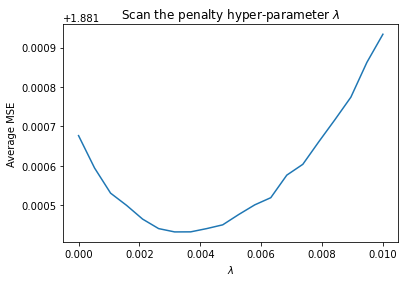

In [16]:
# plot average MSE against lambda
plt.plot(lamb_range_airfoil_lasso, lamb_scores_airfoil_lasso)
plt.xlabel(r'$\lambda$')
plt.ylabel(r'Average MSE')
plt.title('Scan the penalty hyper-parameter $\lambda$')
plt.show()

We divide the training data set into 5 folds and use 4 of them to train the Lasso model and the remaining one to calculate the MSE. In 5-fold cross-validation, we let each fold to be the validate fold once and calculate the average MSE.

As we can see from the plot, we scan through the `lamb_range_airfoil_lasso` and calculate the corresponding average MSE of 5-fold cross-validation. The best $\lambda^*$ is the one with the smallest average MSE which is `best_lamb_airfoil_lasso` as presented above. The value of the best $\lambda^*$ is 0.00316.

1.2.2

Choose the first training/validation split and visualise the inferred parameters $\beta$ as a function of the Lasso penalty $\lambda$.

In [17]:
# choose one training/validation split
val_indexes_airfoil = folds_indexes_airfoil[0]
train_indexes_airfoil = list(set(range(y_train_airfoil.shape[0])) - set(val_indexes_airfoil))

X_train_airfoil_i = x_train_airfoil_aug[train_indexes_airfoil, :]
y_train_airfoil_i = y_train_airfoil[train_indexes_airfoil]

# initialise lambda range and beta list
lamb_airfoil = np.linspace(0, 5, 20)
beta_airfoil = [] # list of beta_1, ..., beta_6

# check how beta varies when lambda changes
for i in lamb_airfoil:
    beta_airfoil_i = lasso_regression(X_train_airfoil_i, y_train_airfoil_i, lamb = i)
    beta_airfoil.append(beta_airfoil_i[1:])

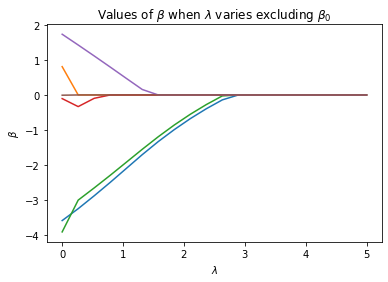

In [18]:
plt.plot(lamb_airfoil, beta_airfoil)
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$\beta$')
plt.title(r'Values of $\beta$ when $\lambda$ varies excluding $\beta_0$')
plt.show()

We can see from the plot that when $\lambda$ increases, the values of model parameters converge to 0. 

In Lasso regression, the penalty parameter $\lambda$ controls the  bias-variance trade-off. When $\lambda$ is small, the Lasso regression model is less regularised so the model fits the training set better. The bias will be lower but the variance will be larger. When $\lambda$ is large, the model is more regularised with more inferred parameters exactly equal to 0. So the variance is smaller but the bias will be larger.

The larger the Lasso penalty is, in order to minimise the loss function, the more the regularisation term tends to be 0. So the inferred parameters will converge to 0 when $\lambda$ increases.

1.2.3

Fix the penalty hyperparameter $\lambda$ to the optimal value $\lambda^*$ and retrain the model on the entire training data set.

In [19]:
# model parameters with optimal penalty
beta_airfoil_lasso = lasso_regression(x_train_airfoil_aug, y_train_airfoil, lamb = best_lamb_airfoil_lasso)

# Mean Squared Error (MSE) for training data set
mse_train_lasso_airfoil = mse_linear(x_train_airfoil_aug, y_train_airfoil, beta_airfoil_lasso)
print("Mean Squared Error of Training Airfoil Data Set by Lasso with optimal penalty:", mse_train_lasso_airfoil)
# R Square for training data set
r2_train_lasso_airfoil = r_square(x_train_airfoil_aug, y_train_airfoil, beta_airfoil_lasso)
print("R-squared of Training Airfoil Data Set by Lasso with optimal penalty:", r2_train_lasso_airfoil)

# Mean Squared Error (MSE) for test data set
mse_test_lasso_airfoil = mse_linear(x_test_airfoil_aug, y_test_airfoil, beta_airfoil_lasso)
print("Mean Squared Error of Test Airfoil Data Set by Lasso with optimal penalty:", mse_test_lasso_airfoil)
# R Square for test data set
r2_test_lasso_airfoil = r_square(x_test_airfoil_aug, y_test_airfoil, beta_airfoil_lasso)
print("R-squared of Test Airfoil Data Set by Lasso with optimal penalty:", r2_test_lasso_airfoil)

Mean Squared Error of Training Airfoil Data Set by Lasso with optimal penalty: 1.8756902599741014
R-squared of Training Airfoil Data Set by Lasso with optimal penalty: 0.9177285368757144
Mean Squared Error of Test Airfoil Data Set by Lasso with optimal penalty: 1.9843295991811745
R-squared of Test Airfoil Data Set by Lasso with optimal penalty: 0.908320017058454


The MSE of test data set is slightly larger than the MSE of training data set and the $R^2$ is slightly smaller than the training data set. This is normal because we trained the model with the training set and the model will be optimised for in-sample data.

|$\lambda$|MSE on Training Data|R-Square on Training Data|MSE on Test Data|R-Square on Test Data|
|:------:|:------:|:------:|:------:|:------:|
|$0$|1.87557|0.917734|1.98439|0.908317|
|$\lambda^*$|1.87569|0.917729|1.98433|0.908320|

The case $\lambda = 0$ is the same as maximum likelihood regression. For in-sample data, the maximum likelihood regression has smaller MSE and larger $R^2$. This is because for in-sample data, the maximum likelihood regression optimizes the model parameters to minimize the difference between the predicted values and the actual values. 

But for out-of-sample data, the Lasso regression with optimal $\lambda^*$ has smaller MSE and larger $R^2$. This is because regularisation avoids some overfitting problem so the model could deal better with unseen data.

#### 1.3 Elastic Nets (20 marks) 
1.3.1

Using the dataset `airfoil_noise_samples.csv` to train a elastic net linear regression.

The Elastic Net regression cost function can be written as:

$$ L_{EN}(\beta_{full}) = \frac{1}{2N} \lVert {\bf {y}} - {\bf {X}}\beta -\beta_0 \rVert^2 + \lambda [\alpha \lVert \beta \rVert_1 + (1-\alpha)\lVert \beta \rVert^2]$$

where $N$ is the number of samples and $\beta_0$ is not included in regularisation.

To find the optimal $\beta^*$ we use gradient descent method. First compute the gradient of this cost function with respect to the coefficients $\beta$, we first take the partial derivative of $L_{EN}(\beta_{full})$ with respect to each coefficient:

$$\frac{\partial L_{EN}}{\partial \beta_0} = -\frac{1}{N} \sum_{i=1}^{N} (y_i - \beta_0 - \sum_{j=1}^{6} \beta_j x_{ij})$$

which is the first entry of $-\frac{1}{N} {\bf {X}}_{aug}^T( {\bf {y}} - {\bf {X}}_{aug} \beta_{full} )$. And for $j=1,2,\dots,6$:

$$\frac{\partial L_{EN}}{\partial \beta_j} = -\frac{1}{N} \sum_{i=1}^{N} x_{ij}(y_i - \beta_0 - \sum_{k=1, k\neq j}^{6} \beta_k x_{ik}) + \lambda \alpha \text{ sign }(\beta_j) + 2\lambda(1- \alpha) \beta_j$$

which is the remaining entries of $-\frac{1}{N} {\bf {X}}_{aug}^T( {\bf {y}} - {\bf {X}}_{aug} \beta_{full} )$ plus $\lambda \alpha \text{ sign }(\beta)+ 2\lambda(1- \alpha) I \beta$. Here ${\bf {X}}_{aug}$ is the predictors with a column of 1.

The gradient vector is then:

$$ (\nabla L_{EN})^T = \begin{bmatrix} \frac{\partial L}{\partial \beta_0} \ \frac{\partial L}{\partial \beta_1} \ \cdots \ \frac{\partial L}{\partial \beta_6} \end{bmatrix} $$

The gradient descent process update $\beta$ every time by

$$\beta_{n+1} = \beta_{n} - l  \nabla_{\beta_{n}} L_{EN} \frac{1}{\lVert\nabla_{\beta_{n}} L_{EN}\rVert_2}$$

where $l$ is the learning rate.

The function stops once $\lVert\nabla_{\beta_{n}} L_{EN}\rVert_2 < \epsilon$ where $\epsilon$ is a threshold.

In [20]:
def elastic_nets_regression(x, y, alpha = 0.5, lamb = 0.001, eps = 1e-6, num_iters = 10000):
    """
    Elastic Nets regression by gradient descent method.
    Arguments:
        x: N x (D+1) matrix of predictors
        y: N x 1 vector of observations
        alpha:  coefficient that controls the relative importance of the Ridge and Lasso terms
        lamb: Lasso penalty hyperparameter
        eps: stop threshold
        num_iters: maximum number of iteration of gradient descent
    Returns: 
        model parameters by Elastic Nets regression using gradient descent method
    """
    
    N, D = x.shape
    # initialize beta
    beta = np.zeros(D)
    beta[0] += np.mean(y)
    
    for i in range(num_iters):
        lr = 1 / (i+1) # learning rate
        
        # gradient of Elastic Nets regression
        gradient = (x.T @ (x @ beta - y)) / N
        gradient[1:] = gradient[1:] + lamb * alpha * np.sign(beta[1:]) + 2 * lamb * (1 - alpha) * (np.identity(D - 1) @ beta[1:])

        beta = beta - lr * gradient / np.linalg.norm(gradient) # gradient descent
        
        # stop threshold
        if np.linalg.norm(gradient) <= eps:
            break
            
    return beta

In [21]:
# train an elastic net regression
beta_EN_airfoil = elastic_nets_regression(x_train_airfoil_aug, y_train_airfoil)
print("Computed model parameters by Elastic Nets regression:", beta_EN_airfoil)

Computed model parameters by Elastic Nets regression: [ 1.23970283e+02 -3.57061060e+00  8.14010015e-01 -3.90799323e+00
 -9.03707290e-02  1.72194697e+00 -1.44244627e-02]


1.3.2

Conduct a grid search to find the optimal penalty hyperparameter $\lambda$ of the elastic nets.

The `score_elastic` function returns the MSE of test data set for model trained by Elastic Nets regression and training data set. The `cross_validation_score_elastic` function employs a k-fold cross-validation and returns the average MSE. The `choose_best_lamb_elastic` function choose the lambda with smallest average MSE in a certain range.

In [22]:
def score_elastic(x_train, y_train, x_test, y_test, alpha, lamb):
    
    beta = elastic_nets_regression(x_train, y_train, alpha = alpha, lamb = lamb) # model parameters by Elastic Nets regression
    y_pred = x_test @ beta # prediction by model for test data set
    
    return np.mean((y_test - y_pred) ** 2) # return MSE on test data set

def cross_validation_score_elastic(x_train, y_train, folds, alpha, lamb):
    """
    Calculate a k-fold cross validation scores by Elastic Nets regression.
    Arguments:
        x_train: N x (D+1) matrix of predictors
        y_train: N x 1 vector of observations
        folds: indexes of k-fold
        alpha:  coefficient that controls the relative importance of the Ridge and Lasso terms
        lamb: penalty parameter of Lasso regression
    Returns: 
        average MSE of k-fold cross validation by Elastic Nets regression
    """
    
    scores = []
    
    for i in range(len(folds)):
        # indexes on train and test data sets of each folds
        val_indexes = folds[i]
        train_indexes = list(set(range(y_train.shape[0])) - set(val_indexes))
        
        # data used to train the Lasso regression
        x_train_i = x_train[train_indexes, :]
        y_train_i = y_train[train_indexes]

        # data used to validate the Lasso regression
        x_val_i = x_train[val_indexes, :]
        y_val_i = y_train[val_indexes] 

        # add score (MSE) to scores
        score_i = score_elastic(x_train_i, y_train_i, x_val_i, y_val_i, alpha, lamb) 
        scores.append(score_i)

    # return the average MSE
    return sum(scores) / len(scores) 

def choose_best_lamb_elastic(x_train, y_train, folds, alpha, lamb_range):
    """
    Choose the best lambda based on average MSE by Elastic Nets regression.
    Arguments:
        x_train: N x (D+1) matrix of predictors
        y_train: N x 1 vector of observations
        folds: indexes of k-fold
        alpha:  coefficient that controls the relative importance of the Ridge and Lasso terms
        lamb_range: a range of penalty parameter of Lasso regression to search on
    Returns: 
        lambda with smallest MSE
    """
    
    # initialise lamb_scores
    lamb_scores = np.zeros((len(lamb_range),))
  
    for i, lamb in enumerate(lamb_range):
        lamb_scores[i] = cross_validation_score_elastic(x_train, y_train, folds, alpha, lamb) # average MSE by k-fold cross-validation
        print(f'Average MSE when lambda = {lamb} and alpha = {alpha}: {lamb_scores[i]:.7f}') # print the average MSE

    # index of lambda with minimum average MSE
    best_lamb_index = np.argmin(lamb_scores)
    
    return lamb_range[best_lamb_index]

Now we repeat the cross-validation process for $\alpha = 0.1, 0.5, 0.9$ and find the optimal $\lambda^*$ for each $\alpha$. Retrain the model with each $\lambda^*$ and calculate the out-of-sample MSE and $R^2$ scores.

In [23]:
lamb_range_airfoil_elastic = [np.linspace(0,0.00005,10), np.linspace(0,0.0006,10), np.linspace(0,0.003,10)] # lists of lambda range
alpha = [0.1, 0.5, 0.9] # alpha values

optimal_lamb_elastic = [] # initialise list of optimal lambda
beta_elastic = [] # initialise list of beta

for i in range(len(alpha)):
    # find optimal lambda for each alpha
    best_lamb_elastic_i = choose_best_lamb_elastic(x_train_airfoil_aug, y_train_airfoil, folds_indexes_airfoil, \
                                                   alpha[i], lamb_range_airfoil_elastic[i])
    optimal_lamb_elastic.append(best_lamb_elastic_i)
    
    # find model parameter for each alpha with corresponding optimal lambda
    beta_elastic_airfoil_i = elastic_nets_regression(x_train_airfoil_aug, y_train_airfoil, alpha = alpha[i], lamb = best_lamb_elastic_i)
    beta_elastic.append(beta_elastic_airfoil_i)
    
    # Mean Squared Error (MSE) for test data set
    mse_test_elastic_airfoil = mse_linear(x_test_airfoil_aug, y_test_airfoil, beta_elastic_airfoil_i)
    print(f'MSE of Test Airfoil Data Set by Elastic Nets when alpha = {alpha[i]} with optimal lambda: {mse_test_elastic_airfoil}')
    # R Square for test data set
    r2_test_elastic_airfoil = r_square(x_test_airfoil_aug, y_test_airfoil, beta_elastic_airfoil_i)
    print(f'R2 of Test Airfoil Data Set by Elastic Nets when alpha = {alpha[i]} with optimal lambda: {r2_test_elastic_airfoil}')

Average MSE when lambda = 0.0 and alpha = 0.1: 1.8816779
Average MSE when lambda = 5.555555555555556e-06 and alpha = 0.1: 1.8816727
Average MSE when lambda = 1.1111111111111112e-05 and alpha = 0.1: 1.8816708
Average MSE when lambda = 1.6666666666666667e-05 and alpha = 0.1: 1.8816695
Average MSE when lambda = 2.2222222222222223e-05 and alpha = 0.1: 1.8816743
Average MSE when lambda = 2.777777777777778e-05 and alpha = 0.1: 1.8816797
Average MSE when lambda = 3.3333333333333335e-05 and alpha = 0.1: 1.8816691
Average MSE when lambda = 3.888888888888889e-05 and alpha = 0.1: 1.8816892
Average MSE when lambda = 4.4444444444444447e-05 and alpha = 0.1: 1.8816844
Average MSE when lambda = 5e-05 and alpha = 0.1: 1.8816789
MSE of Test Airfoil Data Set by Elastic Nets when alpha = 0.1 with optimal lambda: 1.9845000272417561
R2 of Test Airfoil Data Set by Elastic Nets when alpha = 0.1 with optimal lambda: 0.9083121429423328
Average MSE when lambda = 0.0 and alpha = 0.5: 1.8816779
Average MSE when la

In [24]:
print(f'Optimal lambda values when alpha = 0.1, 0.5 and 0.9: {optimal_lamb_elastic}')

Optimal lambda values when alpha = 0.1, 0.5 and 0.9: [3.3333333333333335e-05, 0.00033333333333333327, 0.0016666666666666666]


When $\alpha$ increase, the optimal $\lambda^*$ also increase. 

From the MSE and $R^2$ we can see that $\alpha = 0.1$ has the smallest MSE and largest $R^2$ when fitting test data set, so $\alpha = 0.1$ provides the best model.

1.3.3

Visualise the inferred parameters with the optimal $\lambda^*$ for each value of $\alpha$.

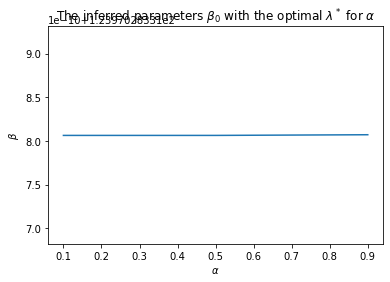

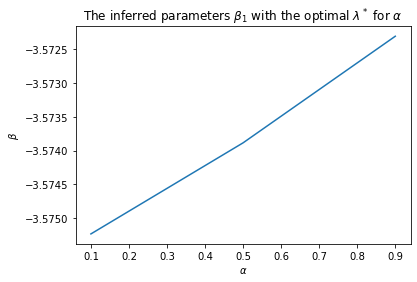

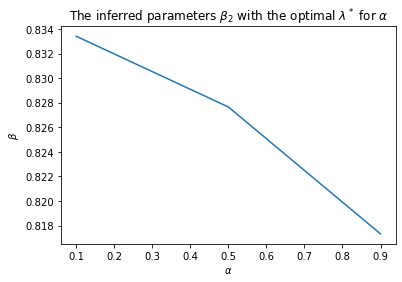

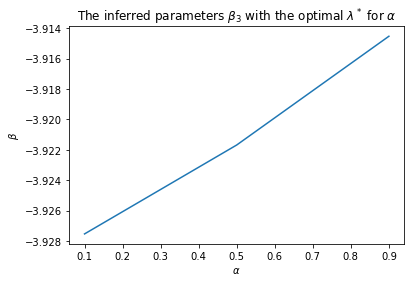

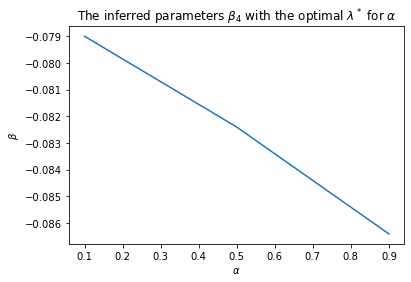

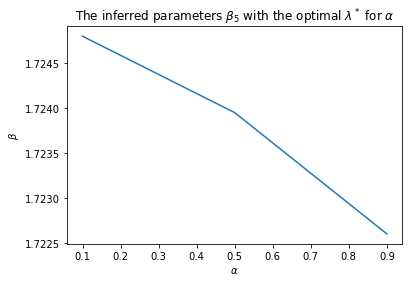

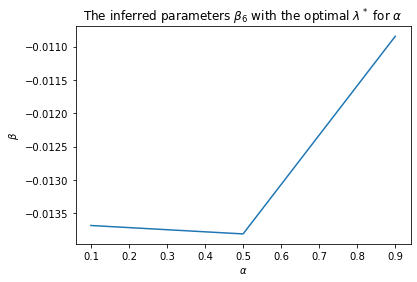

In [25]:
beta_airfoil_elastic = [] # initialise list of beta

# train the Elastic Nets regression
for i in range(3):
    beta_airfoil_elastic_i = elastic_nets_regression(x_train_airfoil_aug, y_train_airfoil, alpha = alpha[i], lamb = optimal_lamb_elastic[i])
    beta_airfoil_elastic.append(beta_airfoil_elastic_i)
    
beta_airfoil_elastic = np.array(beta_airfoil_elastic)
# plot each beta_j separately
for j in range(7):
    plt.plot(alpha, beta_airfoil_elastic[:, j])
    plt.xlabel(r'$\alpha$')
    plt.ylabel(r'$\beta$')
    plt.title(fr'The inferred parameters $\beta_{j}$ with the optimal $\lambda^*$ for $\alpha$')
    plt.show()

Increasing $\alpha$ in Elastic Net regression will increase the effect of the Lasso penalty relative to the Ridge penalty. This will promote sparsity in inferred parameters. As we can see from the plots, generally the magnitude of inferred parameters decrease when $\alpha$ increase except for $\beta_4$.

When $\alpha = 0$, the Elastic Net regression is the same as Ridge regression. The inferred parameters tend to shrink towards zero by the regualrisation. When $\alpha = 1$, the Elastic Net regression is the same as Lasso regression which promotes sparsity in inferred parameters. More inferred parameters will be exactly 0. When $\alpha = 0.5$, the Elastic Net regression is balanced between Lasso and Ridge regressions. The inferred parameters will be both sparse and also shrinks the towards zero for the non-zero ones.

#### 1.4 kNN regression (10 marks)
1.4.1

Train a k-Nearest Neighbour (kNN) regression model on the dataset `airfoil_noise_samples.csv`.

In [26]:
def euclidian_distance(p, q):
    # calculate the euclidian distance between p and q
    return np.sqrt(np.sum((p-q)**2, axis=1)) 

def k_neighbours(X_train, X_test, k=5, return_distance=False):
    """
    Find the nearest k neighbours of test data set in train data set.
    Arguments:
        X_train: N x D matrix of train data set
        X_test: K x D vector of test data set
        k: number of nearest neighbours
        return_distance: a boolean variable indicates whether to return the distance
    Returns: 
        indexes of k nearest neighbours in train data set
    """
    
    n_neighbours = k
    dist = []
    neigh_ind = []
  
    # compute distance from each point x_test in X_test to all points in X_train
    point_dist = [euclidian_distance(x_test, X_train) for x_test in X_test]

    # determine nearest k training points of each test point
    for row in point_dist:
        enum_neigh = enumerate(row)
        sorted_neigh = sorted(enum_neigh, key=lambda x: x[1])[:k]

        ind_list = [tup[0] for tup in sorted_neigh]
        dist_list = [tup[1] for tup in sorted_neigh]

        dist.append(dist_list)
        neigh_ind.append(ind_list)
  
    # return distances together with indexes of k nearest neighbours
    if return_distance:
        return np.array(dist), np.array(neigh_ind)
  
    return np.array(neigh_ind)

def reg_predict(X_train, y_train, X_test, k):
    
    # each of the k neighbours of any data point in X_test  
    neighbours = k_neighbours(X_train, X_test, k=k)
    # compute mean over neighbours observations
    y_pred = np.array([np.mean(y_train.iloc[neighbour]) for neighbour in neighbours])
    
    # return the prediction values of test data set
    return y_pred

In [27]:
# train a kNN regression and make predicts of test data set by the model for k = 20
x_train_airfoil = np.array(x_train_airfoil)
x_test_airfoil = np.array(x_test_airfoil)
y_pred = reg_predict(x_train_airfoil, y_train_airfoil, x_test_airfoil, 20)

Use a grid search with 5-fold cross-validation to find an optimal value of the hyper-parameter $k$.

The `score_kNN` function returns the MSE of test data set for model trained by kNN regression and training data set. The `cross_validation_score_kNN` function employs a n-fold cross-validation and returns the average MSE. The `choose_best_k_kNN` function search for the k with smallest average MSE in a certain range.

In [28]:
def score_kNN(x_train, y_train, x_test, y_test, k):
    
    y_pred = reg_predict(x_train, y_train, x_test, k) # prediction by model for test data set
    
    return np.mean((y_test - y_pred) ** 2) # return MSE on test data set

def cross_validation_score_kNN(x_train, y_train, folds, k):
    """
    Calculate a a-fold cross validation scores by kNN regression.
    Arguments:
        x_train: N x D matrix of predictors
        y_train: N x 1 vector of observations
        folds: indexes of a-fold
        k: parameter for kNN regression
    Returns: 
        average MSE of a-fold cross validation by kNN regression
    """
    
    scores = []
    
    for i in range(len(folds)):
        # indexes on train and test data sets of each folds
        val_indexes = folds[i]
        train_indexes = list(set(range(y_train.shape[0])) - set(val_indexes))
        
        # data used to train the kNN regression
        x_train_i = x_train[train_indexes, :]
        y_train_i = y_train[train_indexes]

        # data used to validate the kNN regression
        x_val_i = x_train[val_indexes, :]
        y_val_i = y_train[val_indexes] 

        # add score (MSE) to scores
        score_i = score_kNN(x_train_i, y_train_i, x_val_i, y_val_i, k)
        scores.append(score_i)

    # return the average MSE
    return sum(scores) / len(scores) 

def choose_best_k_kNN(x_train, y_train, folds, k_range):
    """
    Choose the best lambda based on average MSE by kNN regression.
    Arguments:
        x_train: N x D matrix of predictors
        y_train: N x 1 vector of observations
        folds: indexes of k-fold
        k_range: a range of k of kNN regression to search on
    Returns: 
        k with smallest MSE
    """
    
    # initialise k_scores
    k_scores = np.zeros((len(k_range),))
  
    for i, j in enumerate(k_range):
        k_scores[i] = cross_validation_score_kNN(x_train, y_train, folds, j)
        print(f'Average MSE when k = {j}: {k_scores[i]:.7f}')

    # index of k with minimum average MSE
    best_k_index = np.argmin(k_scores)
    
    # return best k and k_scores
    return k_range[best_k_index], k_scores

In [29]:
k_range_airfoil = np.arange(1,15)

# find the best k
best_k_airfoil_kNN, k_scores_airfoil_kNN = choose_best_k_kNN(x_train_airfoil, y_train_airfoil, folds_indexes_airfoil, k_range_airfoil)

print('Best k of kNN regression by 5-fold cross validation:', best_k_airfoil_kNN)

Average MSE when k = 1: 5.2094659
Average MSE when k = 2: 3.8498780
Average MSE when k = 3: 3.3964586
Average MSE when k = 4: 3.1895516
Average MSE when k = 5: 3.0864886
Average MSE when k = 6: 3.0459041
Average MSE when k = 7: 3.0204949
Average MSE when k = 8: 3.0387562
Average MSE when k = 9: 3.0199336
Average MSE when k = 10: 3.0268354
Average MSE when k = 11: 3.0200673
Average MSE when k = 12: 3.0226436
Average MSE when k = 13: 3.0244081
Average MSE when k = 14: 3.0406294
Best k of kNN regression by 5-fold cross validation: 9


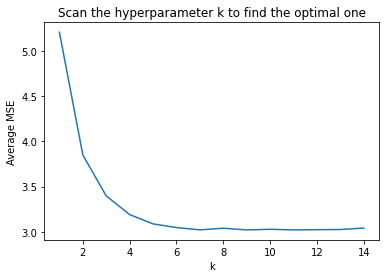

In [30]:
# plot average MSE against k
plt.plot(k_range_airfoil, k_scores_airfoil_kNN)
plt.xlabel(r'k')
plt.ylabel(r'Average MSE')
plt.title('Scan the hyperparameter k to find the optimal one')
plt.show()

We use 5-fold cross-validation to obtain the optimal $k^*$. As we can see from above, generally the average MSE decreases when $k$ increase and becomes stable after $k>6$. The $k^*$ with minimum MSE has value 9.

1.4.2

Fix the optimal k and retrain the model on the entire dataset `airfoil_noise_samples.csv`.

In [31]:
# model parameters with optimal k
y_airfoil_kNN = reg_predict(x_train_airfoil, y_train_airfoil, x_test_airfoil, best_k_airfoil_kNN)

# Mean Squared Error (MSE) for test data set
mse_test_kNN_airfoil = np.mean((y_test_airfoil - y_airfoil_kNN) ** 2)
print("Mean Squared Error of Test Airfoil Data Set by kNN with optimal k:", mse_test_kNN_airfoil)
# R Square for test data set
r2_test_kNN_airfoil = 1 - (np.sum((y_test_airfoil - y_airfoil_kNN) ** 2) / np.sum((y_test_airfoil - np.mean(y_test_airfoil)) ** 2))
print("R-squared of Test Airfoil Data Set by kNN with optimal k:", r2_test_kNN_airfoil)

Mean Squared Error of Test Airfoil Data Set by kNN with optimal k: 2.9835235358838146
R-squared of Test Airfoil Data Set by kNN with optimal k: 0.8621552654415879


|Model|MSE on Test Data|R-Square on Test Data|
|:------:|:------:|:------:|
|Maximum Likelihood|1.98439|0.908317|
|Lasso Regression|1.98433|0.908320|
|Elastic Net|1.98450|0.908312|
|kNN Regression|2.98352|0.862155|

For test data set, we have $\text{MSE}_{\text{Lasso}}<\text{MSE}_{\text{ML}}<\text{MSE}_{\text{EN}}<\text{MSE}_{\text{kNN}}$ and $\text{R}^2_{\text{ML}}>\text{R}^2_{\text{EN}}>\text{R}^2_{\text{Lasso}}>\text{R}^2_{\text{kNN}}$.

The linear regression models (Maximum Likelihood, Lasso and Elastic Nets) performe better than the kNN model in terms of MSE and $\text{R}^2$. So the relationship between the predictors and the outcome may be linear. A linear model may be a better fit for the data.

The regularised linear regression models (Lasso and Elastic Nets) have similar performance to maximum likelihood regression. So there may not be a lot of correlated predictor variables or overfitting in the data. Regularised linear model perform better when facing multicollinearity and overfitting problem.

## Task 2: Classification  (50 marks)



#### 2.1 Random forest (20 marks)
2.1.1

First process the data. `x_train_diabetes_org` and `x_test_diabetes_org` are original data of predictors. In random forest classifier, the magnitude of variables will not affect the result, so there is no need to standardise the data.

In [32]:
# load data as pandas data frames
diabetes_train = pd.read_csv('diabetes_samples.csv', decimal=",")
diabetes_test = pd.read_csv('diabetes_test.csv', decimal=",")

In [33]:
# split to predictors and label
x_train_diabetes_org = diabetes_train[diabetes_train.columns[1:-1]]
x_test_diabetes_org = diabetes_test[diabetes_test.columns[1:-1]]

y_train_diabetes = diabetes_train[diabetes_train.columns[-1]]
y_test_diabetes = diabetes_test[diabetes_test.columns[-1]]

Train a random forest classifier on the dataset `diabetes_samples.csv` employing cross-entropy as information criterion.

In [34]:
def cross_entropy(y, sample_weights):
    """ 
    Calculate the Cross-entropy for labels.
    Arguments:
        y: vector of observations
        sample_weights: weights for each samples, the same shape as y
    Returns:
        the Cross-entropy for y
    """

    # count different categories in y and compute the weight
    label_weights = {yi: 0 for yi in set(y)} # initialize label weight
    for yi, wi in zip(y, sample_weights):
        label_weights[yi] += wi

    total_weight = sum(label_weights.values()) # total weight of different y
    cross_entropy = 0 # initialize Cross-entropy
    for label, weight in label_weights.items():
        cross_entropy -= (weight / total_weight) * (np.log(weight / total_weight)) # compute Cross-entropy

    return cross_entropy

In [35]:
def split_samples(X, y, sample_weights, column, value, categorical):
    """
    Return the split of data based on one column and a threshold value.
    Arguments:
        X: matrix of predictors
        y: vector of observations
        sample_weights: weights for each samples, the same shape as y
        column: the column of the feature for splitting
        value: splitting threshold value
        categorical: boolean variable indicates whether column is a categorical variable or numerical
    Returns:
        tuples of subsets of X, y and sample weights splitted based on column-th value
    """ 
    
    # if the variable is categorical then split data whose column-th feature equals value
    if categorical:
        left_mask =(X[:, column] == value)
    # if the variable is numerical then split data whose column-th feature less than value
    else:
        left_mask = (X[:, column] < value)
        
    # tuple of subsets splitted based on column-th value
    X_left, X_right = X[left_mask, :], X[~left_mask, :]
    y_left, y_right = y[left_mask], y[~left_mask]
    w_left, w_right  = sample_weights[left_mask], sample_weights[~left_mask]

    return (X_left, X_right), (y_left, y_right), (w_left, w_right)

In [36]:
def cross_entropy_split_value(X, y, sample_weights, column, categorical):
    """
    Calculate the Cross entropy based on `column` with the split that minimizes the Cross entropy.
    Arguments:
        X: matrix of predictors
        y: vector of observations
        sample_weights: weights for each samples, the same shape as y
        column: the column of the feature for calculating. 0 <= column < D
        categorical: boolean variable indicates whether column is a categorical variable or numerical
    Returns:
        the resulted Cross entropy and the corresponding value used in splitting
    """
  
    unique_vals = np.unique(X[:, column])

    assert len(unique_vals) > 1, f"There must be more than one distinct feature value. Given: {unique_vals}."

    cross_entropy_val, threshold = np.inf, None
  
    # split the values of i-th feature and calculate the cost 
    for value in unique_vals:
        (X_l, X_r), (y_l, y_r), (w_l, w_r) = split_samples(X, y, sample_weights, column, value, categorical) ## split on every possible value

        # if one of the two sides is empty, skip this split.
        if len(y_l) == 0 or len(y_r) == 0:
            continue
    
        p_left = sum(w_l)/(sum(w_l) + sum(w_r)) # sample weight
        p_right = 1 - p_left
        new_cross_entropy = p_left * cross_entropy(y_l, w_l) + p_right * cross_entropy(y_r, w_r) ## new Cross entropy
        if new_cross_entropy < cross_entropy_val:
            cross_entropy_val, threshold = new_cross_entropy, value
    
    return cross_entropy_val, threshold

In [37]:
def cross_entropy_split_rf(n_features, X, y, sample_weights, columns_dict):
    """
    Choose the best feature to split according to criterion.
    Arguments:
        n_features: number of sampled features.
        X: matrix of predictors
        y: vector of observations
        sample_weights: weights for each samples, the same shape as y
        columns_dict: a dictionary mapping column indices to whether the column is categorical or numerical variable
    Returns:
        the minimized Cross-entropy, the best feature index and value used in splitting
    """
    columns = np.random.choice(list(columns_dict.keys()), n_features, replace=False)
    columns_dict = {c: columns_dict[c] for c in columns}

    min_cross_entropy, split_column, split_val = np.inf, 0, 0
    for column, categorical in columns_dict.items():
        # skip column if samples are not seperable by that column.
        if len(np.unique(X[:, column])) < 2:
            continue

        # search for the best splitting value for the given column.
        cross_entropy, val = cross_entropy_split_value(X, y, sample_weights, column, categorical)
        if cross_entropy < min_cross_entropy:
            min_cross_entropy, split_column, split_val = cross_entropy, column, val

    return min_cross_entropy, split_column, split_val

In [38]:
def majority_vote(y, sample_weights):
    """
    Return the value which appears the most in y.
    Arguments:
        y: vector of observations
        sample_weights: weights for each samples, the same shape as y
    Returns:
        the majority label
    """
    # initialize all possible values of observations
    majority_label = {yi: 0 for yi in set(y)}

    for yi, wi in zip(y, sample_weights):
        majority_label[yi] += wi # the value of y with largest sum of sample weights is the majority
        
    return max(majority_label, key=majority_label.get)

In [39]:
def build_tree_rf(n_features, X, y, sample_weights, columns_dict, feature_names, depth,  max_depth = 10, min_samples_leaf = 2):
    """Build the decision tree according to the data.
    Arguments:
        X: (np.array) training features, of shape (N, D)
        y: (np.array) vector of training labels, of shape (N,)
        sample_weights: weights for each samples, of shape (N,)
        columns_dict: a dictionary mapping column indices to whether the column is categorical or numerical variable
        feature_names (list): record the name of features in X in the original dataset
        depth (int): current depth for this node
    Returns:
        (dict): a dict denoting the decision tree (binary-tree). Each node has seven attributes:
          1. 'feature_name': The column name of the split
          2. 'feature_index': The column index of the split
          3. 'value': The value used for the split
          4. 'categorical': indicator for categorical/numerical variables
          5. 'majority_label': For leaf nodes, this stores the dominant label. Otherwise, it is None
          6. 'left': The left sub-tree with the same structure.
          7. 'right' The right sub-tree with the same structure
    """
    # include a clause for the cases where (i) all lables are the same, (ii) depth exceed (iii) X is too small
    if len(np.unique(y)) == 1 or depth >= max_depth or len(X) <= min_samples_leaf: 
        return {'majority_label': majority_vote(y, sample_weights)}
  
    else:
        cross_entropy, split_index, split_val = cross_entropy_split_rf(n_features, X, y, sample_weights, columns_dict)
    
    # If GI is infinity, it means that samples are not seperable by the sampled features.
        if cross_entropy == np.inf:
            return {'majority_label': majority_vote(y, sample_weights)}
        categorical = columns_dict[split_index]
        (X_l, X_r), (y_l, y_r), (w_l, w_r) = split_samples(X, y, sample_weights, split_index, split_val, categorical)
        return {
            'feature_name': feature_names[split_index],
            'feature_index': split_index,
            'value': split_val,
            'categorical': categorical,
            'majority_label': None,
            'left': build_tree_rf(n_features, X_l, y_l, w_l, columns_dict, feature_names, depth + 1, max_depth, min_samples_leaf),
            'right': build_tree_rf(n_features, X_r, y_r, w_r, columns_dict, feature_names, depth + 1, max_depth, min_samples_leaf)
        }

In [40]:
def train_rf(B, n_features, X, y,  columns_dict, depth = 1, sample_weights = None):
    """
    Build the decision tree according to the training data.
    Arguments:
        B: number of decision trees
        X: (pd.Dataframe) training features, of shape (N, D). Each X[i] is a training sample
        y: (pd.Series) vector of training labels, of shape (N,). y[i] is the label for X[i], and each y[i] is
        an integer in the range 0 <= y[i] <= C. Here C = 1
        columns_dict: a dictionary mapping column indices to whether the column is categorical or numerical variable.
        sample_weights: weights for each samples, of shape (N,)
    Returns:
        the trained random forest tree
    """
    if sample_weights is None:
        # if the sample weights is not provided, we assume the samples have uniform weights
        sample_weights = np.ones(X.shape[0]) / X.shape[0]
    else:
        sample_weights = np.array(sample_weights) / np.sum(sample_weights)

    feature_names = X.columns.tolist()
    X = X.to_numpy()
    y = y.to_numpy()
    N = X.shape[0]
    training_indices = np.arange(N)
    trees = []

    for _ in range(B):
        sample = np.random.choice(training_indices, N, replace=True)
        X_sample = X[sample, :]
        y_sample = y[sample]
        w_sample = sample_weights[sample]
        tree = build_tree_rf(n_features, X_sample, y_sample, w_sample, columns_dict, feature_names, depth = depth)
        trees.append(tree)

    return trees 

In [41]:
def classify(tree, x):
    """
    Classify a single sample with the fitted decision tree.
    Arguments:
        x: ((pd.Dataframe) a single sample features, of shape (D,)
    Returns:
        (int): predicted testing sample label
    """
    if tree['majority_label'] is not None: 
        return tree['majority_label']

    elif tree['categorical']:
        if x[tree['feature_index']] == tree['value']:
            return classify(tree['left'], x)
        else:
            return classify(tree['right'], x)

    else:
        if x[tree['feature_index']] < tree['value']:
            return classify(tree['left'], x)
        else:
            return classify(tree['right'], x)

In [42]:
def predict_rf(rf, X):
    """
    Predict classification results for X.
    Arguments:
        rf: A trained random forest through train_rf function
        X: (pd.Dataframe) testing sample features, of shape (N, D)
    Returns:
        (np.array): predicted testing sample labels, of shape (N,)
    """

    def aggregate(decisions):
        count = defaultdict(int)
        for decision in decisions:
            count[decision] += 1
        return max(count, key=count.get)

    if len(X.shape) == 1:
        return aggregate([classify(tree, X) for tree in rf])
    else:
        return np.array([aggregate([classify(tree, x) for tree in rf]) for x in X])  

In [43]:
def rf_score(rf, X_test, y_test):
    
    y_pred = predict_rf(rf, X_test) 
    
    # return the accuracy of random forest
    return np.mean(y_pred == y_test)

In [44]:
from collections import defaultdict
n_features = x_train_diabetes_org.shape[1] // 3
B = 20
# in this dataset, all features are numerical
columns_dict = {index: False for index in range(x_train_diabetes_org.shape[1])}

# train the random forest classifier
rf = train_rf(B, n_features, x_train_diabetes_org, y_train_diabetes, columns_dict)
# calculate the accuracy of model
acc_rf = rf_score(rf, x_train_diabetes_org.to_numpy(), y_train_diabetes.to_numpy())
print("Accuracy of Training Diabetes Data Set Using Random Forest:", acc_rf)

Accuracy of Training Diabetes Data Set Using Random Forest: 1.0


Now performe a grid search with 4-fold cross-validation to optimise number of decision trees `B` and depth of decision trees `depth` using accuracy as a measurement of performance.

In [45]:
def cross_val_split(N, num_folds):
    
    # divide indexes into num_folds folds
    fold_size = N // num_folds
    index_perm = np.random.permutation(np.arange(N))
    folds = []
    for k in range(num_folds):
        folds.append(index_perm[k*fold_size:(k+1)*fold_size])
    
    # return index of all folds
    return folds

def rf_cross_validation_score(X_train, y_train, folds, B, depth, columns_dict, sample_weights = None):
    """
    Calculate average scores of random forest by k-fold cross-validation.
    Arguments:
        X_train: N x D matrix of predictors
        y_train: N x 1 vector of observations
        folds: indexes of k-fold
        B: number of decision trees
        depth: depth of decision trees
        columns_dict: a dictionary mapping column indices to whether the column is categorical or numerical variable
        sample_weights: weights for each samples, the same shape as y
    Returns: 
        average scores of k-fold cross validation of random forest
    """
    
    scores = []
    for i in range(len(folds)):
        # indexes on train and test data sets of each folds
        val_indexes = folds[i]
        train_indexes = list(set(range(y_train.shape[0])) - set(val_indexes))
    
        # data used to train the random forest
        X_train_i = X_train.iloc[train_indexes]
        y_train_i = y_train[train_indexes]

        # data used to validate the random forest
        X_val_i = X_train.iloc[val_indexes]
        y_val_i = y_train[val_indexes]
        
        # train the random forest method
        rf = train_rf(B, n_features, X_train_i, y_train_i, columns_dict, depth, sample_weights = sample_weights)

        # add score to scores
        score_i = rf_score(rf, X_val_i.to_numpy(), y_val_i.to_numpy())
        scores.append(score_i)

    # return the average score
    return sum(scores) / len(scores)

def rf_choose_best_para(X_train, y_train, folds, B_range, depth_range, columns_dict, sample_weights = None):
    """
    Choose the best B and depth based on average accuracy of random forest model.
    Arguments:
        X_train: N x D matrix of predictors
        y_train: N x 1 vector of observations
        folds: indexes of k-fold
        B_range: range of number of decision trees
        depth_range: range of depth of decision trees
        columns_dict: a dictionary mapping column indices to whether the column is categorical or numerical variable
        sample_weights: weights for each samples, the same shape as y
    Returns: 
        best parameters B and depth
    """
    
    # initialise rf_scores
    rf_scores = np.zeros((len(B_range),len(depth_range)))
  
    # update average accuracy for each different combination of B and depth
    for i, b in enumerate(B_range):
        for j, d in enumerate(depth_range):
            
            # average accuracy by k-fold cross-validation
            rf_scores[i, j] = rf_cross_validation_score(X_train, y_train, folds, b, d, columns_dict, sample_weights = sample_weights)
            print(f'Accuracy when hyperparameters={b,d}: {rf_scores[i,j]:.5f}')

    # indexes of B and depth with maximum average accuracy
    m, n = np.where(rf_scores == rf_scores.max() )
    
    return B_range[m], depth_range[n]

In [47]:
B_range_diabetes = np.arange(9,15) # range of B
depth_range_diabetes = np.arange(1,7) # range of depth
folds_indexes_diabetes = cross_val_split(len(y_train_diabetes), 4) # index of 4-fold

# find the optimal B and depth
opt_B, opt_depth = rf_choose_best_para(x_train_diabetes_org, y_train_diabetes, folds_indexes_diabetes, \
                                       B_range_diabetes, depth_range_diabetes, columns_dict)

print('Best B of random forest by 4-fold cross validation:', opt_B)
print('Best depth of random forest by 4-fold cross validation:', opt_depth)

Accuracy when hyperparameters=(9, 1): 0.88603
Accuracy when hyperparameters=(9, 2): 0.87132
Accuracy when hyperparameters=(9, 3): 0.90074
Accuracy when hyperparameters=(9, 4): 0.88235
Accuracy when hyperparameters=(9, 5): 0.88971
Accuracy when hyperparameters=(9, 6): 0.89338
Accuracy when hyperparameters=(10, 1): 0.89706
Accuracy when hyperparameters=(10, 2): 0.88603
Accuracy when hyperparameters=(10, 3): 0.89338
Accuracy when hyperparameters=(10, 4): 0.91176
Accuracy when hyperparameters=(10, 5): 0.85662
Accuracy when hyperparameters=(10, 6): 0.90441
Accuracy when hyperparameters=(11, 1): 0.87868
Accuracy when hyperparameters=(11, 2): 0.89338
Accuracy when hyperparameters=(11, 3): 0.89706
Accuracy when hyperparameters=(11, 4): 0.87500
Accuracy when hyperparameters=(11, 5): 0.89706
Accuracy when hyperparameters=(11, 6): 0.87868
Accuracy when hyperparameters=(12, 1): 0.90441
Accuracy when hyperparameters=(12, 2): 0.89338
Accuracy when hyperparameters=(12, 3): 0.88971
Accuracy when hyper

2.1.2

Retrain the optimal random forest classifier on the full dataset ` diabetes_samples.csv`.

In [48]:
# train random forest with optimal parameters
rf_opt = train_rf(opt_B[0], n_features, x_train_diabetes_org, y_train_diabetes, columns_dict, depth = opt_depth[0])

Generate confusion matrix of training data set and test data set.

In [49]:
# predicted observation of optimal model
y_pred_opt_train = predict_rf(rf_opt, x_train_diabetes_org.to_numpy())
y_pred_opt_test = predict_rf(rf_opt, x_test_diabetes_org.to_numpy())

# set a dataframe of actual observation and predicted observation of training data set
y_opt_train_df = pd.DataFrame(
    {'y_actual':    y_train_diabetes,
     'y_predicted': y_pred_opt_train
    })

# confusion matrix of training data set
confusion_matrix_train = pd.crosstab(y_opt_train_df['y_actual'], y_opt_train_df['y_predicted'], rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix_train)

Predicted    Diabetes  No diabetes
Actual                            
Diabetes           42            2
No diabetes         2          227


In [50]:
# set a dataframe of actual observation and predicted observation of test data set
y_opt_test_df = pd.DataFrame(
    {'y_actual':    y_test_diabetes,
     'y_predicted': y_pred_opt_test
    })

# confusion matrix of test data set
confusion_matrix_test = pd.crosstab(y_opt_test_df['y_actual'], y_opt_test_df['y_predicted'], rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix_test)

Predicted    Diabetes  No diabetes
Actual                            
Diabetes           10            6
No diabetes         3           98


Obtain true positive (tp), false negative (fn), false positive (fp) and true negative (tn) from the confusion matrix.

In [51]:
# TP, FN, FP and TN for training data set
tp_train = confusion_matrix_train.loc['Diabetes'].loc['Diabetes'] # true positive
fn_train = confusion_matrix_train.loc['Diabetes'].loc['No diabetes'] # false negative
fp_train = confusion_matrix_train.loc['No diabetes'].loc['Diabetes'] # false positive
tn_train = confusion_matrix_train.loc['No diabetes'].loc['No diabetes'] # true negative

In [52]:
# TP, FN, FP and TN for test data set
tp_test = confusion_matrix_test.loc['Diabetes'].loc['Diabetes'] # true positive
fn_test = confusion_matrix_test.loc['Diabetes'].loc['No diabetes'] # false negative
fp_test = confusion_matrix_test.loc['No diabetes'].loc['Diabetes'] # false positive
tn_test = confusion_matrix_test.loc['No diabetes'].loc['No diabetes'] # true negative

Compute different measures from the confusion matrix and compare the performance of training and test data set.

In [53]:
# functions of measures computed from the confusion matrix

# accuracy
def accuracy(tp, tn, fp, fn):
    return (tp + tn) / (tp + tn + fp + fn)

# precision
def precision(tp, fp):
    return tp / (tp + fp)

# recall
def recall(tp, fn):
    return tp / (tp + fn)

# F score
def F_score(tp, fp, fn):
    p = precision(tp, fp)
    r = recall(tp, fn)
    return 2 * (p * r) / (p + r)

In [54]:
# measures of model on training data set
accuracy_train = accuracy(tp_train, tn_train, fp_train, fn_train)
precision_train = precision(tp_train, fp_train)
recall_train = recall(tp_train, fn_train)
F_score_train = F_score(tp_train, fp_train, fn_train)

print('Accuracy of random forest classifier on training data set:', accuracy_train)
print('Precision of random forest classifier on training data set:', precision_train)
print('Recall of random forest classifier on training data set:', recall_train)
print('F score of random forest classifier on training data set:', F_score_train)

Accuracy of random forest classifier on training data set: 0.9853479853479854
Precision of random forest classifier on training data set: 0.9545454545454546
Recall of random forest classifier on training data set: 0.9545454545454546
F score of random forest classifier on training data set: 0.9545454545454546


In [55]:
# measures of model on test data set
accuracy_test = accuracy(tp_test, tn_test, fp_test, fn_test)
precision_test = precision(tp_test, fp_test)
recall_test = recall(tp_test, fn_test)
F_score_test = F_score(tp_test, fp_test, fn_test)

print('Accuracy of random forest classifier on test data set:', accuracy_test)
print('Precision of random forest classifier on test data set:', precision_test)
print('Recall of random forest classifier on test data set:', recall_test)
print('F score of random forest classifier on test data set:', F_score_test)

Accuracy of random forest classifier on test data set: 0.9230769230769231
Precision of random forest classifier on test data set: 0.7692307692307693
Recall of random forest classifier on test data set: 0.625
F score of random forest classifier on test data set: 0.6896551724137931


|Data Set|Accuracy|Precision|Recall|F-score|
|:------:|:------:|:------:|:------:|:------:|
|Training|0.9853|0.9545|0.9545|0.9545|
|Test|0.9231|0.7692|0.625|0.6897|

Generally the model performs better in training data set than in test data set. There may be overfitting problem.

The accuracy of the random forest on the training data set is higher than on the test data set. So the model does not perform well when facing unseen data.

The precision of the model on the training data set is higher than on the test data set. So the random forest model is better at avoiding false positives on the training data set than on the test data set.

The recall of the random forest on the training data set is higher than on the test data set which indicates that the model is better at identifying true positives on the training data set than on the test data set.

The F-score of the model on the training data set is higher than on the test data set. So the model is better at balancing precision and recall on the training data set than on the test data set.

2.1.3

Demonstrate that the dataset `diabetes_samples.csv` is unbalanced.

In [56]:
# Count the frequencies of diagnosis outcomes
num_diabetes = np.sum(y_train_diabetes == 'Diabetes')
num_no_diabetes = np.sum(y_train_diabetes == 'No diabetes')

print('Frequency of diabetes patients:', num_diabetes)
print('Frequency of no diabetes patients:', num_no_diabetes)

Frequency of diabetes patients: 44
Frequency of no diabetes patients: 229


As we can see from the result above, the frequency of diabetes is much less than the frequency of no diabetes. The data set is unbalanced. So we need to introduce appropriate weights to balance the diagnosis outcomes.

Use $f_d$ and $f_n$ represent the proportions of diabetes and no diabetes and $w_d$ and $w_n$ represent their weights. We want $w_df_d = w_nf_n$, so we can let $w_d=\frac{1}{f_d}$ and $w_n=\frac{1}{f_n}$.

In [57]:
# Compute the proportion of the diagnosis outcomes
prop_diabetes = num_diabetes / len(y_train_diabetes)
prop_no_diabetes = num_no_diabetes / len(y_train_diabetes)

# weights to balance the outcomes
weights_balance = np.where(y_train_diabetes == 'Diabetes', 1 / prop_diabetes, 1 / prop_no_diabetes)

Now train the random forest using the weights in the bootstrap step and use 4-fold cross-validation to find the optimal parameters.

In [64]:
B_range_diabetes = np.arange(9,15)
depth_range_diabetes = np.arange(1,7)

# find the best B and depth
opt_B_balance, opt_depth_balance = rf_choose_best_para(x_train_diabetes_org, y_train_diabetes, folds_indexes_diabetes, B_range_diabetes, \
                                                       depth_range_diabetes, columns_dict, sample_weights = weights_balance)
print('Best B of balanced random forest by 4-fold cross validation:', opt_B_balance)
print('Best depth of balanced random forest by 4-fold cross validation:', opt_depth_balance)

Accuracy when hyperparameters=(9, 1): 0.89706
Accuracy when hyperparameters=(9, 2): 0.89338
Accuracy when hyperparameters=(9, 3): 0.89338
Accuracy when hyperparameters=(9, 4): 0.87868
Accuracy when hyperparameters=(9, 5): 0.88971
Accuracy when hyperparameters=(9, 6): 0.88235
Accuracy when hyperparameters=(10, 1): 0.91544
Accuracy when hyperparameters=(10, 2): 0.90441
Accuracy when hyperparameters=(10, 3): 0.88971
Accuracy when hyperparameters=(10, 4): 0.91176
Accuracy when hyperparameters=(10, 5): 0.90809
Accuracy when hyperparameters=(10, 6): 0.90441
Accuracy when hyperparameters=(11, 1): 0.90441
Accuracy when hyperparameters=(11, 2): 0.90441
Accuracy when hyperparameters=(11, 3): 0.92279
Accuracy when hyperparameters=(11, 4): 0.89706
Accuracy when hyperparameters=(11, 5): 0.89338
Accuracy when hyperparameters=(11, 6): 0.91176
Accuracy when hyperparameters=(12, 1): 0.90441
Accuracy when hyperparameters=(12, 2): 0.89706
Accuracy when hyperparameters=(12, 3): 0.89706
Accuracy when hyper

Generate confusion matrix of training data set and test data set of balanced random forest.

In [65]:
# train balanced random forest with optimal parameters
rf_opt_balance = train_rf(opt_B_balance[0], n_features, x_train_diabetes_org, y_train_diabetes, columns_dict, depth = opt_depth_balance[0])

# predicted observation of optimal balanced model
y_pred_opt_train_balance = predict_rf(rf_opt_balance, x_train_diabetes_org.to_numpy())
y_pred_opt_test_balance = predict_rf(rf_opt_balance, x_test_diabetes_org.to_numpy())

# set a dataframe of actual observation and predicted observation of training data set
y_opt_train_df_balance = pd.DataFrame(
    {'y_actual':    y_train_diabetes,
     'y_predicted': y_pred_opt_train_balance
    })

# confusion matrix of training data set of balanced random forest
confusion_matrix_train_balance = pd.crosstab(y_opt_train_df_balance['y_actual'], y_opt_train_df_balance['y_predicted'], \
                                             rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix_train_balance)

Predicted    Diabetes  No diabetes
Actual                            
Diabetes           42            2
No diabetes         0          229


In [66]:
# set a dataframe of actual observation and predicted observation of test data set
y_opt_test_df_balance = pd.DataFrame(
    {'y_actual':    y_test_diabetes,
     'y_predicted': y_pred_opt_test_balance
    })

# confusion matrix of test data set of  balanced random forest
confusion_matrix_test_balance = pd.crosstab(y_opt_test_df_balance['y_actual'], y_opt_test_df_balance['y_predicted'], \
                                            rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix_test_balance)

Predicted    Diabetes  No diabetes
Actual                            
Diabetes            9            7
No diabetes         2           99


Obtain true positive (tp), false negative (fn), false positive (fp) and true negative (tn) from the confusion matrix of balanced random forest. Compute different measures from the confusion matrix.

In [67]:
# TP, FN, FP and TN for training data set of balanced random forest
tp_train_balance = confusion_matrix_train_balance.loc['Diabetes'].loc['Diabetes'] # true positive of balanced random forest
fn_train_balance = confusion_matrix_train_balance.loc['Diabetes'].loc['No diabetes'] # false negative of balanced random forest
fp_train_balance = confusion_matrix_train_balance.loc['No diabetes'].loc['Diabetes'] # false positive of balanced random forest
tn_train_balance = confusion_matrix_train_balance.loc['No diabetes'].loc['No diabetes'] # true negative of balanced random forest

In [68]:
# TP, FN, FP and TN for test data set of balanced random forest
tp_test_balance = confusion_matrix_test_balance.loc['Diabetes'].loc['Diabetes'] # true positive of balanced random forest
fn_test_balance = confusion_matrix_test_balance.loc['Diabetes'].loc['No diabetes'] # false negative of balanced random forest
fp_test_balance = confusion_matrix_test_balance.loc['No diabetes'].loc['Diabetes'] # false positive of balanced random forest
tn_test_balance = confusion_matrix_test_balance.loc['No diabetes'].loc['No diabetes'] # true negative of balanced random forest

In [69]:
# measures of model on training data set of balanced random forest
accuracy_train_balance = accuracy(tp_train_balance, tn_train_balance, fp_train_balance, fn_train_balance)
precision_train_balance = precision(tp_train_balance, fp_train_balance)
recall_train_balance = recall(tp_train_balance, fn_train_balance)
F_score_train_balance = F_score(tp_train_balance, fp_train_balance, fn_train_balance)

print('Accuracy of balanced random forest classifier on training data set:', accuracy_train_balance)
print('Precision of balanced random forest classifier on training data set:', precision_train_balance)
print('Recall of balanced random forest classifier on training data set:', recall_train_balance)
print('F score of balanced random forest classifier on training data set:', F_score_train_balance)

Accuracy of balanced random forest classifier on training data set: 0.9926739926739927
Precision of balanced random forest classifier on training data set: 1.0
Recall of balanced random forest classifier on training data set: 0.9545454545454546
F score of balanced random forest classifier on training data set: 0.9767441860465117


In [70]:
# measures of model on test data set of balanced random forest
accuracy_test_balance = accuracy(tp_test_balance, tn_test_balance, fp_test_balance, fn_test_balance)
precision_test_balance = precision(tp_test_balance, fp_test_balance)
recall_test_balance = recall(tp_test_balance, fn_test_balance)
F_score_test_balance = F_score(tp_test_balance, fp_test_balance, fn_test_balance)

print('Accuracy of balanced random forest classifier on test data set:', accuracy_test_balance)
print('Precision of balanced random forest classifier on test data set:', precision_test_balance)
print('Recall of balanced random forest classifier on test data set:', recall_test_balance)
print('F score of balanced random forest classifier on test data set:', F_score_test_balance)

Accuracy of balanced random forest classifier on test data set: 0.9230769230769231
Precision of balanced random forest classifier on test data set: 0.8181818181818182
Recall of balanced random forest classifier on test data set: 0.5625
F score of balanced random forest classifier on test data set: 0.6666666666666666


|Data Set|Unbalanced Accuracy|Unbalanced Precision|Unbalanced Recall|Unbalanced F-score|Balanced Accuracy|Balanced Precision|Balanced Recall|Balanced F-score|
|:------:|:------:|:------:|:------:|:------:|:------:|:------:|:------:|:------:|
|Training|0.9853|0.9545|0.9545|0.9545|0.9927|1.0|0.9545|0.9767|
|Test|0.9231|0.7692|0.625|0.6897|0.9231|0.8182|0.5625|0.6667|

For the balanced random forest, the accuracy of the model on the training data set is higher than the accuracy on the test data set which is what we expected.

The precision of balanced model on the training data set is 1.0, which means that there is no false positive predictions on the training data. The precision on the test data set is still high, but lower than on the training data. So the model is good at avoiding false positives on both datasets, but slightly better on the training data.

The recall of the model on the training dataset is higher than the recall on the test dataset so the model is better at identifying true positives on the training data.

The F-score of the model on the training data set is higher than the F-score on the test data set so the model is better at balancing precision and recall on the training data than on the test data.

Generally the model fits better on training data set than on test data set. The balanced model outperformed the unbalanced one in accuracy and precision.

Now plot the ROC curve and the Precision-Recall curve. 

First modify `predict_rf` to include threshold as an input. So that the classifier only identify as diabetes when the proportion of diabetes vote is larger than or equal to the threshold.

In [71]:
# convert categorical labels to numbers
diag_map = {'No diabetes': 0, 'Diabetes': 1}
y_pred_balance_df = pd.DataFrame (y_pred_opt_train_balance, columns = ['diabetes'])
y_pred_opt_train_balance_num = y_pred_balance_df['diabetes'].map(diag_map)
y_train_diabetes_num = y_train_diabetes.map(diag_map)
y_test_diabetes_num = y_test_diabetes.map(diag_map)

In [72]:
def predict_rf_threshold(rf, X, threshold=0.5):
    """
    Predict classification results for X with threshold applies.
    Arguments:
        rf: A trained random forest
        X: testing sample features, of shape (N, D)
        threshold: classification threshold to use
    Returns:
        predicted testing sample labels
    """

    def aggregate(decisions):
        count = defaultdict(int)
        for decision in decisions:
            count[decision] += 1
        prob_diabetes = count['Diabetes'] / len(decisions) # probability of being classified to diabetes
        
        # classify as diabete only when the probability of diabetes is greater than threshold
        return 1 if prob_diabetes >= threshold else 0
    
    if len(X.shape) == 1:
        return aggregate([classify(tree, X) for tree in rf])
    else:
        return np.array([aggregate([classify(tree, x) for tree in rf]) for x in X])

In [73]:
def roc_curve(y_true, rf, X, thresholds):
    """
    Return measures necessary for ROC and PR curve.
    Arguments:
        y_true: ground truth labels with size (n, )
        rf: A trained random forest
        X: testing sample features, of shape (N, D)
        threshold: classification threshold to use
    Returns: 
        auc: area under the ROC curve
        ap: average precision - area under the PR curve
        tpr_l: a list of true positive rate (TPR) values for each scanned threshold
        fpr_l: a list of false positive rate (FPR) values for each scanned threshold
        precision_l: a list of precision values for each scanned threshold
        thresholds: the scanned thresholds sorted descendingly
    """
    tpr_l, fpr_l, precision_l = [], [], []

    for threshold in thresholds:
        # Apply thresholding to the random forest classifier
        y_pred = predict_rf_threshold(rf, X, threshold)

        # true positives
        tp = np.sum(y_true & y_pred)
        # false positives
        fp = np.sum((~y_true) & y_pred)
        # false negatives
        fn = np.sum(y_true & (~y_pred))
        # true negatives
        tn = len(y_true) - tp - fp - fn
        
        # calculate precision
        if (tp + fp) == 0: # avoid undefined situation
            precision = 1
        else:
            precision = tp / (tp + fp)
        precision_l.append(precision)

        # calculate tpr and fpr
        tpr = tp / (tp + fn)
        fpr = fp / (tn + fp)
        tpr_l.append(tpr)
        fpr_l.append(fpr)

    # Compute AUC and AP using Trapezoidal rule
    auc = -np.trapz(tpr_l, fpr_l)
    ap = -np.trapz(precision_l, tpr_l)
    return auc, ap, tpr_l, fpr_l, precision_l, thresholds

Now plot ROC for both balanced random forest and unbalanced random forest with thresholds vary from 0 to 1 in `thresholds`.

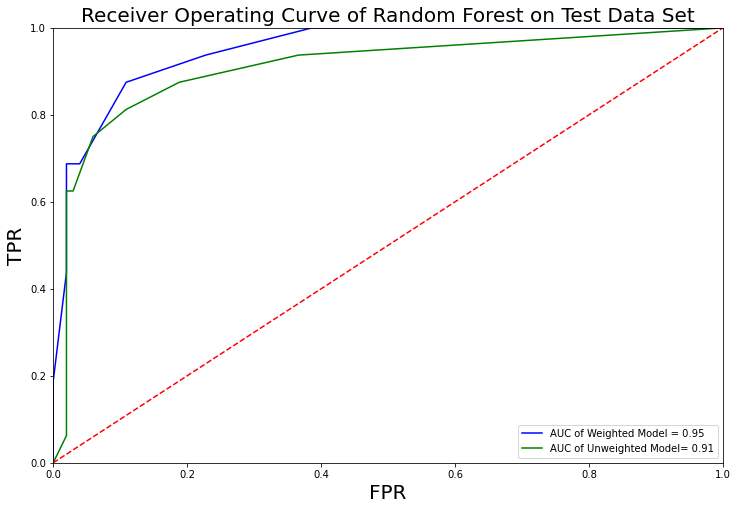

In [74]:
thresholds = np.linspace(0,1,100)
# balanced model
auc,ap,tpr,fpr,precision_l,th = roc_curve(y_test_diabetes_num, rf_opt_balance, x_test_diabetes_org.to_numpy(), thresholds) 
# unbalanced model
auc_2,ap_2,tpr_2,fpr_2,precision_l_2,th_2 = roc_curve(y_test_diabetes_num, rf_opt, x_test_diabetes_org.to_numpy(), thresholds) 

# plot ROC on test data set
plt.figure(figsize=(12,8))
plt.title(f"Receiver Operating Curve of Random Forest on Test Data Set", size=20)
plt.plot(fpr, tpr, 'b', label = f'AUC of Weighted Model = {auc:0.2f}')
plt.plot(fpr_2, tpr_2, 'g', label = f'AUC of Unweighted Model= {auc_2:0.2f}')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('TPR', size=20)
plt.xlabel('FPR', size=20)
plt.legend()
plt.show()

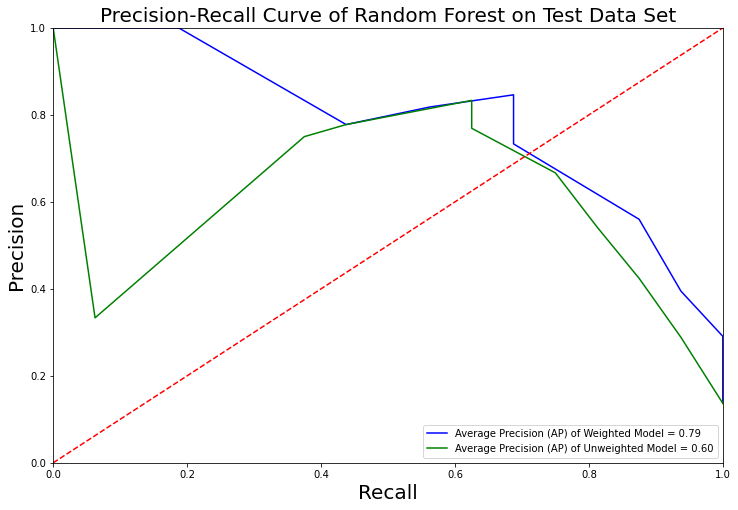

In [75]:
# plot ROC on test data set
plt.figure(figsize=(12,8))
plt.title(f"Precision-Recall Curve of Random Forest on Test Data Set", size=20)
plt.plot(tpr, precision_l, 'b', label = f'Average Precision (AP) of Weighted Model = {ap:0.2f}')
plt.plot(tpr_2, precision_l_2, 'g', label = f'Average Precision (AP) of Unweighted Model = {ap_2:0.2f}')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision', size=20)
plt.xlabel('Recall', size=20)
plt.legend()
plt.show()

For the area under the curve, weighted random forest has higher AUC and higher AP value.  It can correctly identify diabetes patients as positive and rank diabetes patients accurately.

From the plot of ROC curve, we can see that weighted model has higher TPR than unweighted one when FPR is fixed. So weighted model performs better in identifying diabetes patients. From PR curve, the weighted model outperforms the unweighted one in precision when recall is fixed, so the model can rank diabetes patients more accurately.

#### 2.2	Support Vector Machine (SVM) (30 marks)
2.2.1

First process the data. `x_train_diabetes_org` and `x_test_diabetes_org` are original data of predictors and map diabetes and no diabetes into numbers -1 and 1. In Support Vector Machine, the magnitude of predictors will affect the distance in hyperplane, causing problems in classification. So we need to standardise data of predictor variables. `x_train_diabetes` and `x_test_diabetes` are standardised data of predictors. Also add a column of 1 to $X$ to include intercept $b$ (`x_train_diabetes_aug` and `x_test_diabetes_aug`).

In [76]:
# load data as pandas data frames
diabetes_train = pd.read_csv('diabetes_samples.csv', decimal=",")
diabetes_test = pd.read_csv('diabetes_test.csv', decimal=",")

In [77]:
# set column id as dataframe index and drop the column of index
diabetes_train_ind = diabetes_train.set_index(diabetes_train['patient_number']).drop(diabetes_train.columns[0], axis=1)
diabetes_test_ind = diabetes_test.set_index(diabetes_test['patient_number']).drop(diabetes_test.columns[0], axis=1)

# convert categorical labels to numbers
diag_map = {'No diabetes': 1.0, 'Diabetes': -1.0}
diabetes_train_ind['diabetes'] = diabetes_train_ind['diabetes'].map(diag_map)
diabetes_test_ind['diabetes'] = diabetes_test_ind['diabetes'].map(diag_map)

# put observations and predictors in different dataframes
y_train_diabetes = diabetes_train_ind.loc[:, 'diabetes']
x_train_diabetes_org =diabetes_train_ind.iloc[:, :-1]
y_test_diabetes = diabetes_test_ind.loc[:, 'diabetes']
x_test_diabetes_org =diabetes_test_ind.iloc[:, :-1]

# standardise predictors
x_train_diabetes = standardise(x_train_diabetes_org)
x_test_diabetes = standardise(x_test_diabetes_org)

# modify type of data
data_train = np.hstack((x_train_diabetes, y_train_diabetes[:, np.newaxis]))
x_train_diabetes = data_train[:,:-1]
y_train_diabetes = data_train[:, -1]
data_test = np.hstack((x_test_diabetes, y_test_diabetes[:, np.newaxis]))
x_test_diabetes = data_test[:,:-1]
y_test_diabetes = data_test[:, -1]
y_train_diabetes = y_train_diabetes.astype(float)
y_test_diabetes = y_test_diabetes.astype(float)

# insert 1 in every row for intercept b
x_train_diabetes_aug = np.hstack((x_train_diabetes, np.ones((len(x_train_diabetes),1)) ))
x_test_diabetes_aug = np.hstack((x_test_diabetes, np.ones((len(x_test_diabetes),1)) ))    

<ipython-input-77-addc4d25422c>:21: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  data_train = np.hstack((x_train_diabetes, y_train_diabetes[:, np.newaxis]))
<ipython-input-77-addc4d25422c>:24: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  data_test = np.hstack((x_test_diabetes, y_test_diabetes[:, np.newaxis]))


Train a soft-margin linear SVM classifier.

In [78]:
def compute_cost(w, X, y, regul_strength=1e5):
    n = X.shape[0]
    distances = 1 - y * (X @ w)  # size of violation
    distances[distances < 0] = 0  # equivalent to max(0, distance)
    hinge = regul_strength * distances.mean() 
    
    # calculate cost
    return 0.5 * np.dot(w, w) + hinge -0.5 * w[-1]**2 # w[-1] is the intercept needs to be excluded from norm

In [79]:
def calculate_cost_gradient(w, X_batch, y_batch, regul_strength=1e6):
    # if only one example is passed
    if type(y_batch) == np.float64:
        y_batch = np.asarray([y_batch])
        X_batch = np.asarray([X_batch])  # gives multidimensional array

    distance = 1 - (y_batch * (X_batch @ w)) # size of violation
    dw = np.zeros(len(w))
  
    we = w.copy() # not to overwrite w
    we[-1] = 0 # not to have b in its derivative when adding the weights in di
    
    for ind, d in enumerate(distance):
        if max(0, d)==0:
            di = we # derivative of first term
        else:
            di = we - (regul_strength * y_batch[ind] * X_batch[ind])
        dw += di

    return dw/len(y_batch)  # average

In [80]:
def sgd(X, y, max_iterations=2000, stop_criterion=0.01, learning_rate=1e-5, regul_strength=1e6, print_outcome=False):
  
    # initialise zero weights
    weights = np.zeros(X.shape[1])
    nth = 0
    # initialise starting cost as infinity
    prev_cost = np.inf
  
    # stochastic gradient descent
    indices = np.arange(len(y))

    for iteration in range(1, max_iterations):
        # shuffle to prevent repeating update cycles
        np.random.shuffle(indices)
        X, y = X[indices], y[indices]
    
        for xi, yi in zip(X, y):
            descent = calculate_cost_gradient(weights, xi, yi, regul_strength)
            weights = weights - (learning_rate * descent)

        # convergence check on 2^n'th iteration
        if iteration==2**nth or iteration==max_iterations-1:
            # compute cost
            cost = compute_cost(weights, X, y, regul_strength)
            if print_outcome:
                print("Iteration is: {}, Cost is: {}".format(iteration, cost))
            # stop criterion
            if abs(prev_cost - cost) < stop_criterion * prev_cost:
                return weights
        
            prev_cost = cost
            nth += 1
  
    return weights

In [81]:
lamb = 10

# train a soft-margin linear SVM classifier for lambda = 10
w = sgd(x_train_diabetes_aug, y_train_diabetes, max_iterations=2000, stop_criterion=0.001, learning_rate=1e-5, \
        regul_strength=lamb, print_outcome=True)
print("Training finished.")

Iteration is: 1, Cost is: 9.763280431126166
Iteration is: 2, Cost is: 9.527173115840915
Iteration is: 4, Cost is: 9.056797409515212
Iteration is: 8, Cost is: 8.123094823564834
Iteration is: 16, Cost is: 6.2973093802642275
Iteration is: 32, Cost is: 4.0067149697722515
Iteration is: 64, Cost is: 2.4672838549000256
Iteration is: 128, Cost is: 2.293591905963328
Iteration is: 256, Cost is: 2.2735471831510536
Iteration is: 512, Cost is: 2.268377987520442
Iteration is: 1024, Cost is: 2.26750769924742
Training finished.


Use a 4-fold cross-validation to optimise the hardness hyperparameter $\lambda$ with accuracy as a measure of performance.

In [82]:
def score_SVM(w, X, y): 
    
    y_preds = np.sign(X @ w)
    
    return np.mean(y_preds == y) # return accuracy of SVM

In [83]:
def cross_val_evaluate(data, num_folds, lamb):
    
    folds = cross_val_split(data.shape[0], num_folds) # split the data into num_folds folds

    train_scores = []
    val_scores = []
  
    for i in range(len(folds)):

        val_indices = folds[i]
        # define the training set
        train_indices = list(set(range(data.shape[0])) - set(val_indices))

        X_train = data[train_indices,  :-1]
        y_train = data[train_indices, -1]
    
        # define the validation set
        X_val = data[val_indices,  :-1]
        y_val = data[val_indices, -1]
    
        # insert 1 in every row for intercept b
        X_train = np.hstack((X_train, np.ones((len(X_train),1)) ))
        X_val = np.hstack((X_val, np.ones((len(X_val),1)) ))
        
        # train the model
        w = sgd(X_train, y_train, max_iterations=1025, stop_criterion=0.01, learning_rate=1e-5, regul_strength=lamb)

        # evaluate
        train_score = score_SVM(w, X_train, y_train)
        val_score = score_SVM(w, X_val, y_val)

        train_scores.append(train_score)
        val_scores.append(val_score)

    return train_scores, val_scores

def choose_best_lamb_SVM(data, num_folds, lamb_range):
    
    lamb_scores = np.zeros((len(lamb_range),))
  
    # search through all lambda in lamb_range
    for i, l in enumerate(lamb_range):
        train_scores, val_scores = cross_val_evaluate(data, num_folds, l)
        lamb_scores[i] = np.mean(val_scores)
        print(f'Accuracy of soft-margin SVM when lambda={l}: {lamb_scores[i]:.7f}')

    # find the optimal lambda
    best_lamb_index = np.argmax(lamb_scores)
    return lamb_range[best_lamb_index], lamb_scores

In [84]:
lamb_range_diabetes = np.linspace(0,30,20)[1:]
best_lamb_diabetes_SVM, lamb_scores_diabetes_SVM = choose_best_lamb_SVM(data_train, 4, lamb_range_diabetes)
print('Optimal lambda for soft-margin SVM:', best_lamb_diabetes_SVM)

Accuracy of soft-margin SVM when lambda=1.5789473684210527: 0.8455882
Accuracy of soft-margin SVM when lambda=3.1578947368421053: 0.8566176
Accuracy of soft-margin SVM when lambda=4.7368421052631575: 0.8676471
Accuracy of soft-margin SVM when lambda=6.315789473684211: 0.9007353
Accuracy of soft-margin SVM when lambda=7.894736842105264: 0.9044118
Accuracy of soft-margin SVM when lambda=9.473684210526315: 0.8970588
Accuracy of soft-margin SVM when lambda=11.052631578947368: 0.8970588
Accuracy of soft-margin SVM when lambda=12.631578947368421: 0.9117647
Accuracy of soft-margin SVM when lambda=14.210526315789474: 0.9044118
Accuracy of soft-margin SVM when lambda=15.789473684210527: 0.9154412
Accuracy of soft-margin SVM when lambda=17.36842105263158: 0.9080882
Accuracy of soft-margin SVM when lambda=18.94736842105263: 0.8970588
Accuracy of soft-margin SVM when lambda=20.526315789473685: 0.9191176
Accuracy of soft-margin SVM when lambda=22.105263157894736: 0.9044118
Accuracy of soft-margin S

The average accuracy of SVM classifiers as $\lambda$ varies is displayed above.

The magnitude of $\lambda$ defines the hardness of soft margin SVM. When $\lambda$ is small, the model allows more misclassifications on trianing data set so that will be inaccurate. As we can see when $\lambda = 1.58$, the average accuracy of model is only 0.85. When $\lambda$ is large, the model will become too hard and cause overfitting problem. The average accuracy of model will decrease because of its poor ability dealing with unseen data. For example, when $\lambda = 28.42$, the average accuracy of model is 0.90 which is also not optimal. The optimal $\lambda^*=20.53$ and the optimal model has accuracy 0.92.

2.2.2

Calculate the cosine of the angle between each pair of hyperplanes for each value of $\lambda$.

In [86]:
hyperplanes = []

# hyperplane for each lambda in lamb_range_diabetes
for lamb in lamb_range_diabetes:
    w = sgd(x_train_diabetes_aug, y_train_diabetes, max_iterations=2000, stop_criterion=0.001, learning_rate=1e-5, \
            regul_strength=lamb, print_outcome=False)
    hyperplanes.append(w)

Report the results on a square heatmap as a function of the $\lambda$ of each hyperplane.

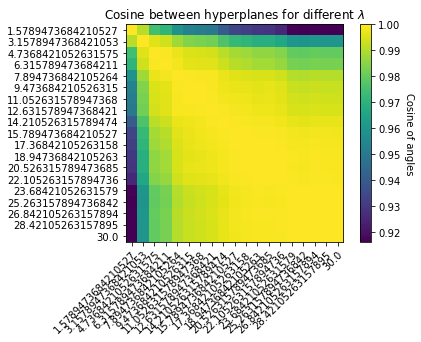

In [87]:
def unit_vector(vector):
    # returns the unit vector of the vector
    return vector / np.linalg.norm(vector)

# compute the cosine of angle matrix between all pairs of hyperplanes
cos_matrix = np.zeros((len(hyperplanes),len(hyperplanes)))
for i in range(len(hyperplanes)):
    for j in range(len(hyperplanes)):
        cos_matrix[i,j] = np.dot(unit_vector(hyperplanes[i]),unit_vector(hyperplanes[j]))

fig, ax = plt.subplots()
im = ax.imshow(cos_matrix)

# set the x and y axis ticks to the lambda range
ax.set_xticks(np.arange(len(lamb_range_diabetes)))
ax.set_yticks(np.arange(len(lamb_range_diabetes)))
ax.set_xticklabels(lamb_range_diabetes)
ax.set_yticklabels(lamb_range_diabetes)

# rotate the x-axis tick labels
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# add a colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Cosine of angles", rotation=-90, va="bottom")

# set the title of the plot
ax.set_title("Cosine between hyperplanes for different $\lambda$")

plt.show()

The label on the x-axis and y-axis are values of $\lambda$.

2.2.3

Retrain the optimal linear SVM on the full data set `diabetes_samples.csv `.

In [89]:
# train the model with optimal lambda
w_opt = sgd(x_train_diabetes_aug, y_train_diabetes, max_iterations=2000, stop_criterion=0.001, learning_rate=1e-5, \
            regul_strength=best_lamb_diabetes_SVM, print_outcome=True)

Iteration is: 1, Cost is: 19.528946220890706
Iteration is: 2, Cost is: 18.534031424500974
Iteration is: 4, Cost is: 16.552036987037198
Iteration is: 8, Cost is: 12.658154416224269
Iteration is: 16, Cost is: 7.921625245370166
Iteration is: 32, Cost is: 4.827358226261027
Iteration is: 64, Cost is: 4.436558418276704
Iteration is: 128, Cost is: 4.367267355054754
Iteration is: 256, Cost is: 4.338884362948267
Iteration is: 512, Cost is: 4.334640642010089


Evaluate its performance on the test data set `diabetes_test.csv`, using accuracy, precision and F-score.

In [90]:
# predict test observations using optimal SVM
y_preds_test = np.sign(x_test_diabetes_aug @ w_opt)

# set a dataframe of actual observation and predicted observation of test data set
y_opt_train_df = pd.DataFrame(
    {'y_actual':    y_test_diabetes,
     'y_predicted': y_preds_test
    })

# confusion matrix of test data set
confusion_matrix_test_SVM = pd.crosstab(y_opt_train_df['y_actual'], y_opt_train_df['y_predicted'], \
                                        rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix_test_SVM)

Predicted  -1.0   1.0
Actual               
-1.0          9     7
 1.0          2    99


In [91]:
# TP, FN, FP and TN for test data set
tp_test_SVM = confusion_matrix_test_SVM.iloc[0,0] # true positive
fn_test_SVM = confusion_matrix_test_SVM.iloc[0,1] # false negative
fp_test_SVM = confusion_matrix_test_SVM.iloc[1,0] # false positive
tn_test_SVM = confusion_matrix_test_SVM.iloc[1,1] # true negative

In [92]:
# measures of model on test data set
accuracy_test_SVM = accuracy(tp_test_SVM, tn_test_SVM, fp_test_SVM, fn_test_SVM)
precision_test_SVM = precision(tp_test_SVM, fp_test_SVM)
F_score_test_SVM = F_score(tp_test_SVM, fp_test_SVM, fn_test_SVM)

print('Accuracy of optimal SVM on test data set:', accuracy_test_SVM)
print('Precision of optimal SVM on test data set:', precision_test_SVM)
print('F score of optimal SVM on test data set:', F_score_test_SVM)

Accuracy of optimal SVM on test data set: 0.9230769230769231
Precision of optimal SVM on test data set: 0.8181818181818182
F score of optimal SVM on test data set: 0.6666666666666666


An accuracy of 0.923 indicates that the SVM model is able to correctly classify 92.3% of the test data. The precision of 0.818 indicates that when the model predicts a positive class, it is correct 81.8% of the time. So the model is good at ranking the diabetes patients. The F-score of 0.667 is a weighted harmonic mean of precision and recall. The balance between precision and recall is not good in the optimal SVM model.

2.2.4

Implement a soft-margin kernelised SVM classifier using sigmoid kernel. 

In [93]:
def kernel_matrix(X1, X2, sigma):
    
    n1,m1 = X1.shape
    n2,m2 = X2.shape
    kernel = np.zeros((n1,n2))

    # define a sigmoid kernel
    for i in range(n1):
        for j in range(n2):
            kernel[i,j] = np.tanh(sigma * np.dot(X1[i,:], X2[j,:]) + 1)

    return kernel

In [94]:
def compute_cost_kernel(u, K, y, regul_strength=1e3, intercept=0):

    # define the hinge cost with the kernel trick, the intercept should be kept separate
    
    distances = 1 - (y)*(K@u + intercept)
    distances[distances < 0] = 0  # equivalent to max(0, distance)
    hinge = regul_strength * distances.mean()

    # calculate cost
    return 0.5 * np.dot(u,K@u) + hinge

In [95]:
def calculate_cost_gradient_kernel(u, K_batch, y_batch, regul_strength=1e3,intercept=0):

    # if only one example is passed
    if type(y_batch) == np.float64 or type(y_batch) == np.int32:
        y_batch = np.asarray([y_batch])
        K_batch = np.asarray([K_batch])  # gives multidimensional array
    
    distance = 1 - (y_batch * (K_batch @ u + intercept))
    dw = np.zeros(len(u))
    db = 0

    # define the gradient of w and b with the hinge loss
    for ind, d in enumerate(distance):
        if max(0, d)==0:
            di = K_batch@u
            bi = 0
        else:
            di = K_batch@u - (regul_strength * y_batch[ind] * K_batch[ind])
            bi = - (regul_strength * y_batch[ind])
        dw += di
        db += bi

    return dw/len(y_batch), db/len(y_batch)

Minimise the cost function by stochastic gradient descent method.

In [96]:
def sgd_kernel(K, y, batch_size=32, max_iterations=4000, stop_criterion=0.001, learning_rate=1e-4, regul_strength=1e3, print_outcome=False):

    # initialise zero u and intercept
    u = np.zeros(K.shape[1])
    intercept = 0
    
    nth = 0
    # initialise starting cost as infinity
    prev_cost = np.inf
    
    # stochastic gradient descent
    indices = np.arange(len(y))
    for iteration in range(1, max_iterations):
        # shuffle to prevent repeating update cycles
        np.random.shuffle(indices)
        batch_idx = indices[:batch_size]
        K_b, y_b = K[batch_idx], y[batch_idx]
        for ki, yi in zip(K_b, y_b):
            ascent, b_ascent = calculate_cost_gradient_kernel(u, ki, yi, regul_strength, intercept)
            u = u - (learning_rate * ascent)
            intercept = intercept - (learning_rate * b_ascent)
        
        # convergence check on 2^n'th iteration
        if iteration==2**nth or iteration==max_iterations-1:
            # compute cost
            cost = compute_cost_kernel(u, K, y, regul_strength, intercept)
            if print_outcome:
                print("Iteration is: {}, Cost is: {}".format(iteration, cost))
            # stop criterion
            if abs(prev_cost - cost) < stop_criterion * prev_cost:
                return u, intercept
            
            prev_cost = cost
            nth += 1
    
    return u, intercept

Fix the hardness hyperparameter to $\lambda = 10$ and train the soft margin kernelised SVM classifier on the data set `diabetes_samples.csv`. Present the values of intercept $b$ for each $\sigma$.

In [97]:
reg = 10 # fix lambda
b_list = []

# consider the accuracy of model for a range of sigma
for sigma in [0.01, 0.1, 1, 2]:
    
    print('For sigma = ' + str(sigma))
    K_train = kernel_matrix(x_train_diabetes, x_train_diabetes, sigma)

    u, b = sgd_kernel(K_train, y_train_diabetes, batch_size=128, max_iterations=2000, stop_criterion=0.001, \
                     learning_rate=1e-5, regul_strength=reg, print_outcome=False)
    b_list.append(b)
    
    print(fr"The inferred value of the intercept is {b}.")

For sigma = 0.01
The inferred value of the intercept is 0.9762999999999088.
For sigma = 0.1
The inferred value of the intercept is 1.0739999999998981.
For sigma = 1
The inferred value of the intercept is 1.5313999999998478.
For sigma = 2
The inferred value of the intercept is 1.4594999999998557.


2.2.5

Evaluate accuracy, precision and F-score of the kernelised SVM classifier.

In [98]:
y_preds = []
sigma_list = [0.01, 0.1, 1, 2]

for sigma in sigma_list:
    
    K_train = kernel_matrix(x_train_diabetes, x_train_diabetes, sigma)

    u, b = sgd_kernel(K_train, y_train_diabetes, batch_size=128, max_iterations=2000, stop_criterion=0.001, \
                      learning_rate=1e-5, regul_strength=reg, print_outcome=False)
    
    K_test = kernel_matrix(x_test_diabetes, x_train_diabetes, sigma) # define the kernel containing test data
    
    y_pred_i = np.sign(K_test @ u + b) # prediction by SVM
    
    y_preds.append(y_pred_i)

In [99]:
for i in range(4):
    tp_KSVM = np.sum((y_test_diabetes == -1) & (y_preds[i] == -1)) # true positive
    tn_KSVM = np.sum((y_test_diabetes == 1) & (y_preds[i] == 1)) # true negative
    fp_KSVM = np.sum((y_test_diabetes == 1) & (y_preds[i] == -1)) # false positive
    fn_KSVM = np.sum((y_test_diabetes == -1) & (y_preds[i] == 1)) # false negative
    
    print(fr"Accuracy on test set when sigma = {sigma_list[i]}: {accuracy(tp_KSVM, tn_KSVM, fp_KSVM, fn_KSVM)}")
    print(fr"Precision on test set when sigma = {sigma_list[i]}: {precision(tp_KSVM, fp_KSVM)}")
    print(fr"F-score on test set when sigma = {sigma_list[i]}: {F_score(tp_KSVM, fp_KSVM, fn_KSVM)}")

Accuracy on test set when sigma = 0.01: 0.8632478632478633
Precision on test set when sigma = 0.01: nan
F-score on test set when sigma = 0.01: nan
Accuracy on test set when sigma = 0.1: 0.9316239316239316
Precision on test set when sigma = 0.1: 0.8333333333333334
F-score on test set when sigma = 0.1: 0.7142857142857143
Accuracy on test set when sigma = 1: 0.9230769230769231
Precision on test set when sigma = 1: 0.7333333333333333
F-score on test set when sigma = 1: 0.7096774193548386
Accuracy on test set when sigma = 2: 0.8974358974358975
Precision on test set when sigma = 2: 0.6111111111111112
F-score on test set when sigma = 2: 0.6470588235294118


<ipython-input-53-24159f53205f>:9: RuntimeWarning: invalid value encountered in long_scalars
  return tp / (tp + fp)


|Model|Accuracy|Precision|F-score|
|:------:|:------:|:------:|:------:|
|soft-margin SVM|0.923|0.818|0.667|
|Kernelised SVM $\sigma = 0.01$|0.863|-|-|
|Kernelised SVM $\sigma = 0.1$|0.932|0.833|0.714|
|Kernelised SVM $\sigma = 1$|0.923|0.733|0.710|
|Kernelised SVM $\sigma = 2$|0.897|0.611|0.647|

When $\sigma = 0.01$, all labels are predected as no diabetes, so the true positive and false positive are 0. The denominator of precision and F-score is 0.

The optimal soft-margin linear SVM has higher accuracy and precision than kernelised SVM, but lower F-value when $\sigma = 1, 2$. The kernelised SVM with $\sigma = 0.1$ has the highest accuracy, precision and F-score, which means that it is able to capture the underlying structure of data. So data may have a nonlinear structure that cannot be classified by a linear model. A higher-dimensional space might be needed to separate the data.

For further improvement of the kernelised SVM, we can optimise hyperparameters $\sigma$ and $\lambda$ by methods like grid search.